<a href="https://colab.research.google.com/github/shravanineeli/ML_Projects/blob/main/Time_Series_ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Starter Code

In [ ]:
# Install yfinance library
!pip install yfinance --upgrade --no-cache-dir

# Import the necessary libraries
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [ ]:
# Define the ticker symbol and the period
ticker_symbol = 'NVDA'
start_date = '2019-07-31'
end_date = '2024-07-31'

# Download the stock data
nvda_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows of the dataframe
nvda_data.index.name = 'Date'
nvda_data = nvda_data.reset_index()
nvda_data.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
1248,2024-07-17,121.349998,121.849998,116.720001,117.989998,117.989998,390086200
1249,2024-07-18,121.849998,122.400002,116.559998,121.089996,121.089996,320979500
1250,2024-07-19,120.349998,121.599998,117.370003,117.930000,117.930000,217223800
1251,2024-07-22,120.349998,124.070000,119.860001,123.540001,123.540001,258068900
1252,2024-07-23,122.779999,124.690002,122.099998,122.589996,122.589996,173911000
1253,2024-07-24,119.169998,119.949997,113.440002,114.250000,114.250000,327776900
1254,2024-07-25,113.040001,116.629997,106.300003,112.279999,112.279999,460067000
1255,2024-07-26,116.190002,116.199997,111.580002,113.059998,113.059998,293399100
1256,2024-07-29,113.690002,116.279999,111.300003,111.589996,111.589996,248152100
1257,2024-07-30,111.519997,111.989998,102.540001,103.730003,103.730003,486833300


In [ ]:
# Checking the amount of columns and rows
nvda_data.shape

(1258, 7)

In [ ]:
# Checking the data types to make sure the date is correct
nvda_data.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [ ]:
# Checking for missing values
nvda_data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
# Define the ticker symbol and the period
ticker_symbol = 'AAPL'
start_date = '2019-07-31'
end_date = '2024-07-31'

# Download the stock data
aapl_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the last few rows of the dataframe
aapl_data.index.name = 'Date'
aapl_data = aapl_data.reset_index()
aapl_data.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
1248,2024-07-17,229.449997,231.460007,226.639999,228.880005,228.880005,57345900
1249,2024-07-18,230.279999,230.440002,222.270004,224.179993,224.179993,66034600
1250,2024-07-19,224.820007,226.800003,223.279999,224.309998,224.309998,49151500
1251,2024-07-22,227.009995,227.779999,223.089996,223.960007,223.960007,48201800
1252,2024-07-23,224.369995,226.940002,222.679993,225.009995,225.009995,39960300
1253,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.539993,61777600
1254,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.490005,51391200
1255,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.960007,41601300
1256,2024-07-29,216.960007,219.300003,215.750000,218.240005,218.240005,36311800
1257,2024-07-30,219.190002,220.330002,216.119995,218.800003,218.800003,41643800


In [ ]:
# Checking the amount of columns and rows
aapl_data.shape

(1258, 7)

In [ ]:
# Checking the data types to make sure the date is correct
aapl_data.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [ ]:
# Checking for missing values
aapl_data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
# Define the ticker symbol and the period
ticker_symbol = 'MSFT'
start_date = '2019-07-31'
end_date = '2024-07-31'

# Download the stock data
msft_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the last few rows of the dataframe
msft_data.index.name = 'Date'
msft_data = msft_data.reset_index()
msft_data.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
1248,2024-07-17,442.589996,444.850006,439.179993,443.519989,443.519989,21778000
1249,2024-07-18,444.339996,444.649994,434.399994,440.369995,440.369995,20794800
1250,2024-07-19,433.100006,441.140015,432.000000,437.109985,437.109985,20940400
1251,2024-07-22,441.790009,444.600006,438.910004,442.940002,442.940002,15808800
1252,2024-07-23,443.899994,448.390015,443.100006,444.850006,444.850006,13107100
1253,2024-07-24,440.450012,441.480011,427.589996,428.899994,428.899994,26805800
1254,2024-07-25,428.799988,429.799988,417.510010,418.399994,418.399994,29943800
1255,2024-07-26,418.200012,428.920013,417.269989,425.269989,425.269989,23583800
1256,2024-07-29,431.579987,432.149994,424.700012,426.730011,426.730011,15125800
1257,2024-07-30,427.720001,429.049988,417.359985,422.920013,422.920013,32687600


In [ ]:
# Checking the amount of columns and rows
msft_data.shape

(1258, 7)

In [ ]:
# Checking the data types to make sure the date is correct
msft_data.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [ ]:
# Checking for missing values
msft_data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


# EDA

## NVDA

In [ ]:
# Quick EDA
nvda_data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,2022-01-27 06:08:35.103338752,27.896948,28.409411,27.337752,27.897332,27.875041,4.536867e+08
min,2019-07-31 00:00:00,3.747500,3.790750,3.684750,3.719250,3.697903,9.788400e+07
25%,2020-10-27 06:00:00,12.805625,13.026563,12.587000,12.739500,12.715458,3.209030e+08
50%,2022-01-26 12:00:00,18.010500,18.445500,17.719501,18.061000,18.045676,4.277150e+08
75%,2023-04-27 18:00:00,30.989250,31.391250,30.000000,30.680250,30.636847,5.513095e+08
max,2024-07-30 00:00:00,139.800003,140.759995,132.419998,135.580002,135.580002,1.543911e+09
std,NaN,27.119658,27.587762,26.515770,27.059126,27.065627,1.858439e+08


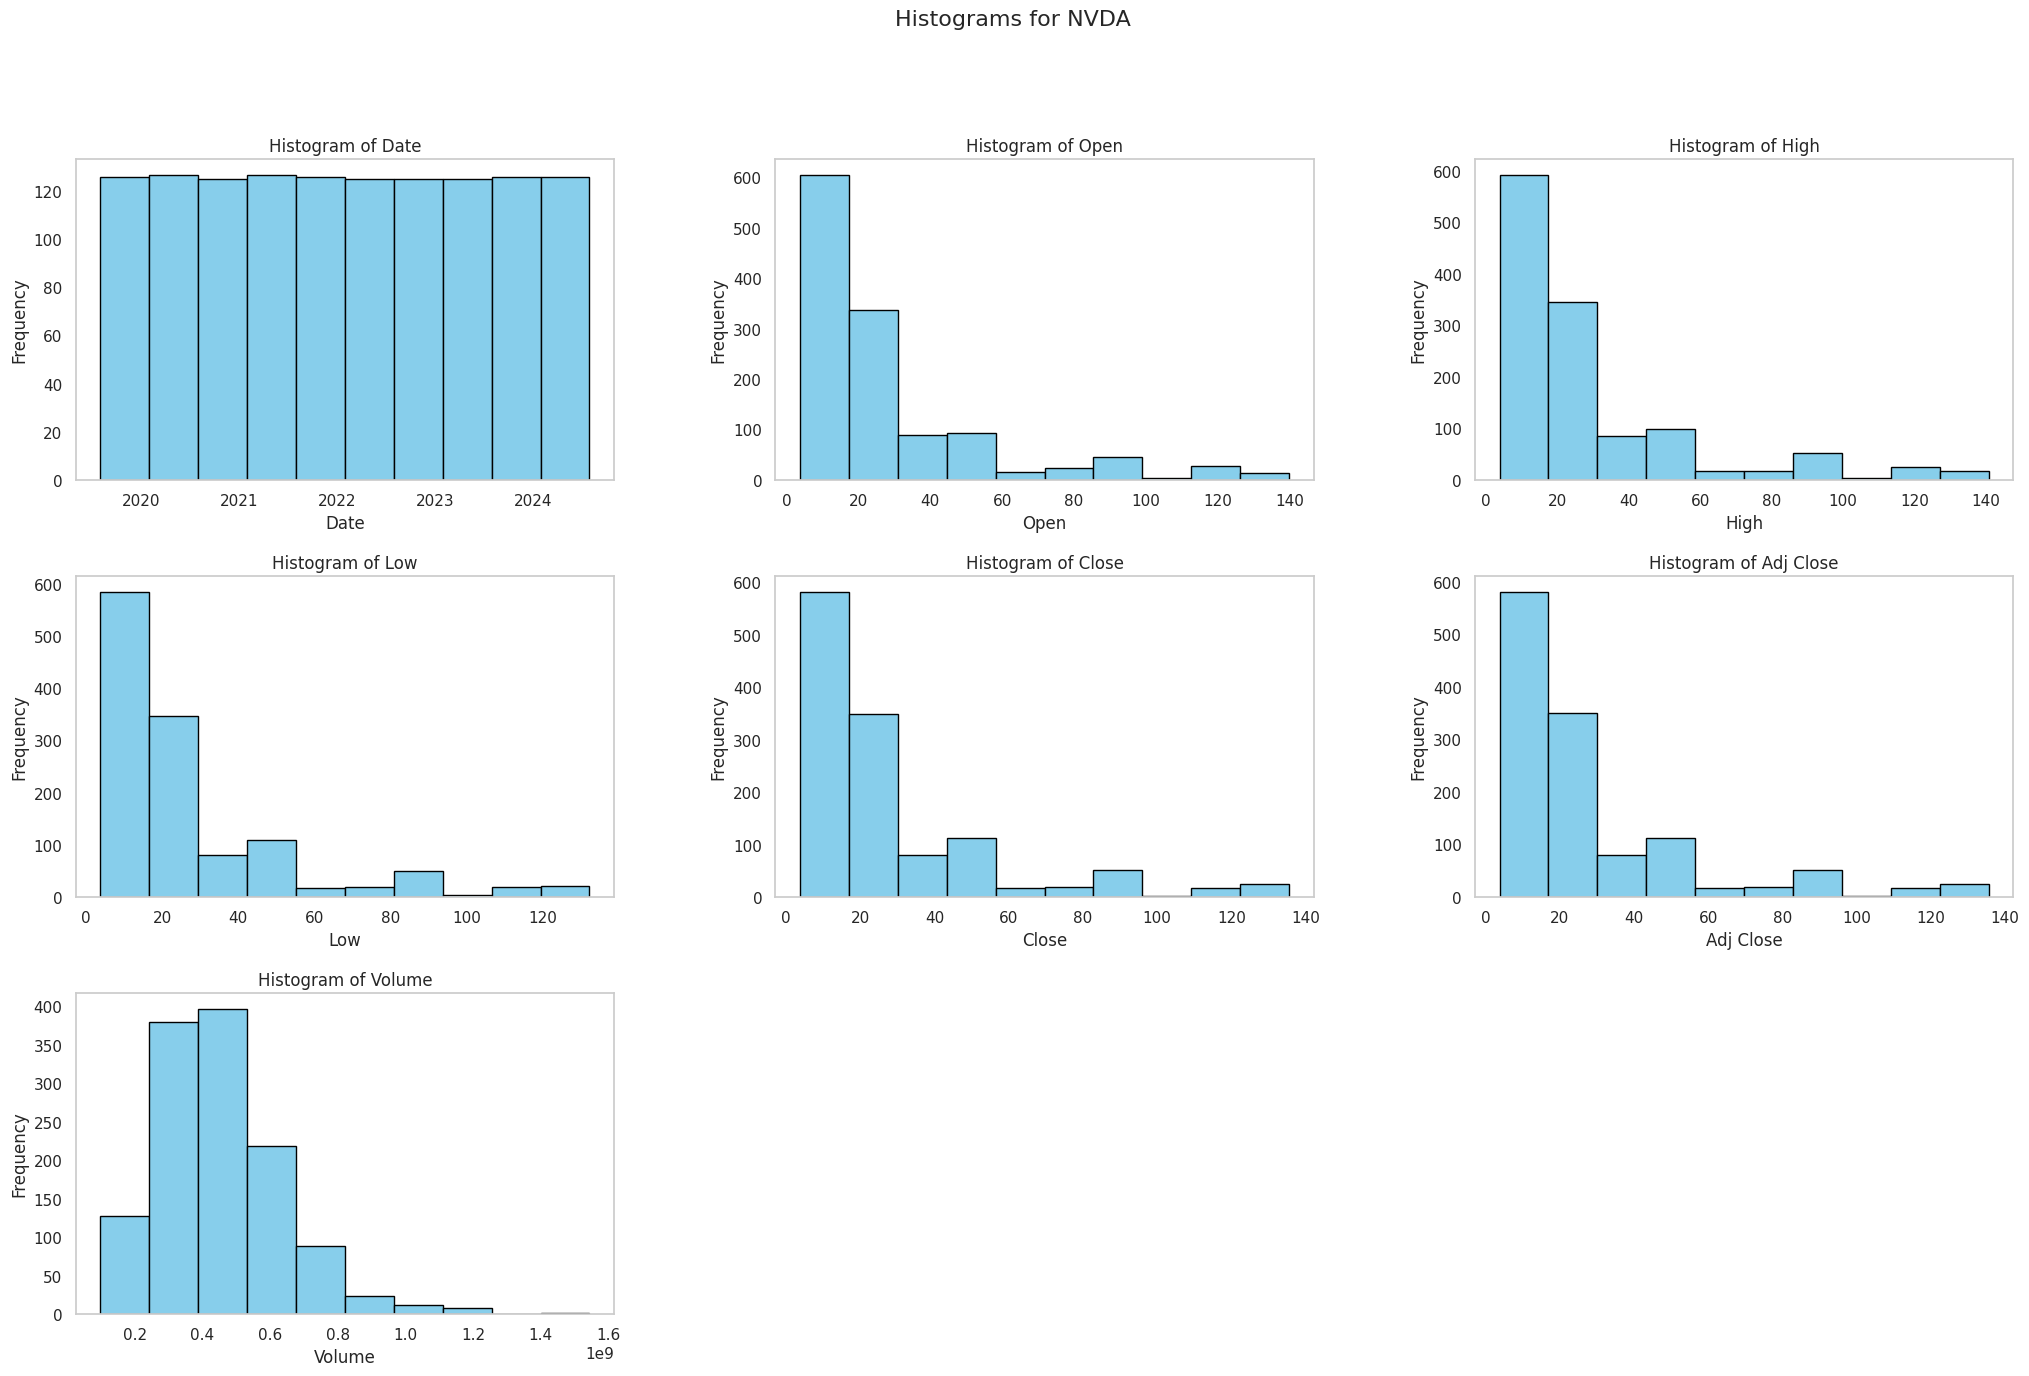

In [ ]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create histograms
nvda_data.hist(bins=10, figsize=(25, 15), color='skyblue', edgecolor='black', grid=False)

# Add labels and title
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_title())
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of ' + ax.get_title())

# Add overall title
plt.suptitle('Histograms for NVDA', fontsize=16)

# Show the plot
plt.show()

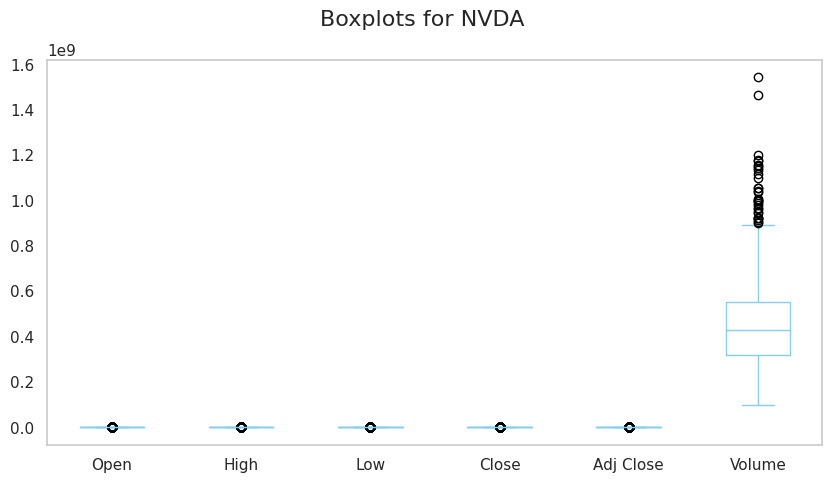

In [ ]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create histograms
nvda_data.boxplot(figsize=(10, 5), color='skyblue', grid=False)

# Add labels and title
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_title())

# Add overall title
plt.suptitle('Boxplots for NVDA', fontsize=16)

# Show the plot
plt.show()

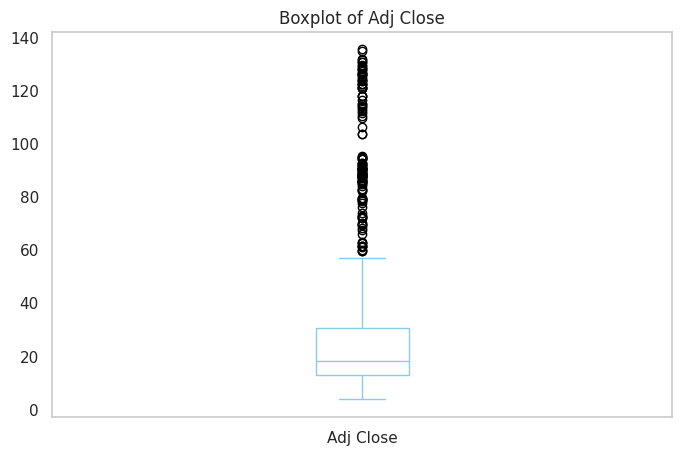

In [ ]:
# Closer look at Adj Close since we will be making the ARIMA model with it
sns.set(style="whitegrid")
nvda_data.boxplot('Adj Close', color='skyblue', grid=False, figsize=(8, 5))
plt.title('Boxplot of Adj Close')
plt.show()

In [ ]:
nvda_data = nvda_data[nvda_data['Adj Close'] < 35]

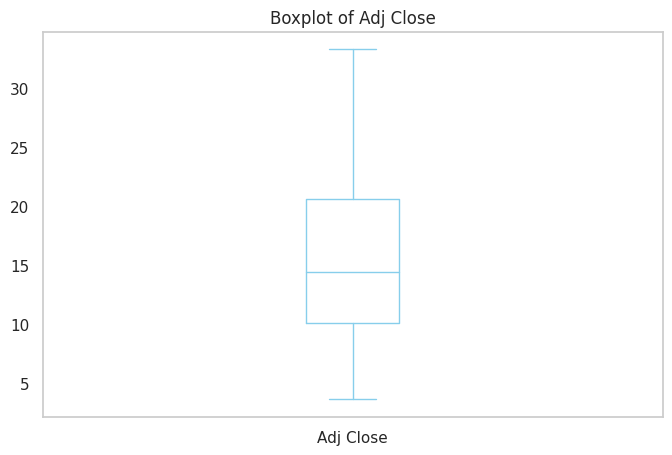

In [ ]:
#Checking for more outliers
sns.set(style="whitegrid")
nvda_data.boxplot('Adj Close', color='skyblue', grid=False, figsize=(8, 5))
plt.title('Boxplot of Adj Close')
plt.show()

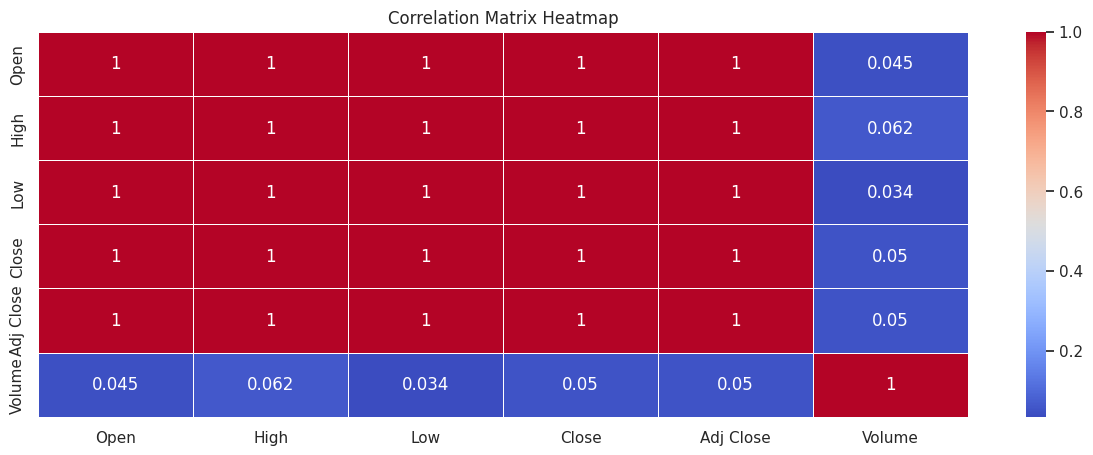

In [ ]:
# Filter the DataFrame to include only numeric columns
numeric_nvda_data = nvda_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_nvda_data.corr()

# Create a heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Analysis of EDA for NVDA

The focus of the analysis will only be on Adj Close as it is the only column which will be used for the model.

Through the histogram, it is noticed that the data is right-skewed. And through the boxplot, multiple outliers were noticed.

This was then fixed by removing the outliers to ensure that the data is clean and uniform for the model.

Through the correlation matrix, we notice that there is high correlation between Open, High, Low, Close, and Adj Close. This is logical considering they represent the same price of the stock but at different points in day.

## AAPL

In [ ]:
# Quick EDA
aapl_data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,2022-01-27 06:08:35.103338752,139.469559,141.033377,138.008430,139.586703,137.984447,9.580589e+07
min,2019-07-31 00:00:00,48.852501,49.517502,48.145000,48.334999,46.647976,2.404830e+07
25%,2020-10-27 06:00:00,118.660000,119.965000,116.539997,118.652500,116.287035,6.098632e+07
50%,2022-01-26 12:00:00,146.739998,148.324997,145.279999,146.785004,144.799339,8.186960e+07
75%,2023-04-27 18:00:00,171.750000,173.585003,170.487495,172.134998,170.615520,1.124727e+08
max,2024-07-30 00:00:00,236.479996,237.229996,233.089996,234.820007,234.820007,4.265100e+08
std,NaN,42.074361,42.362405,41.772372,42.065633,42.485905,5.244145e+07


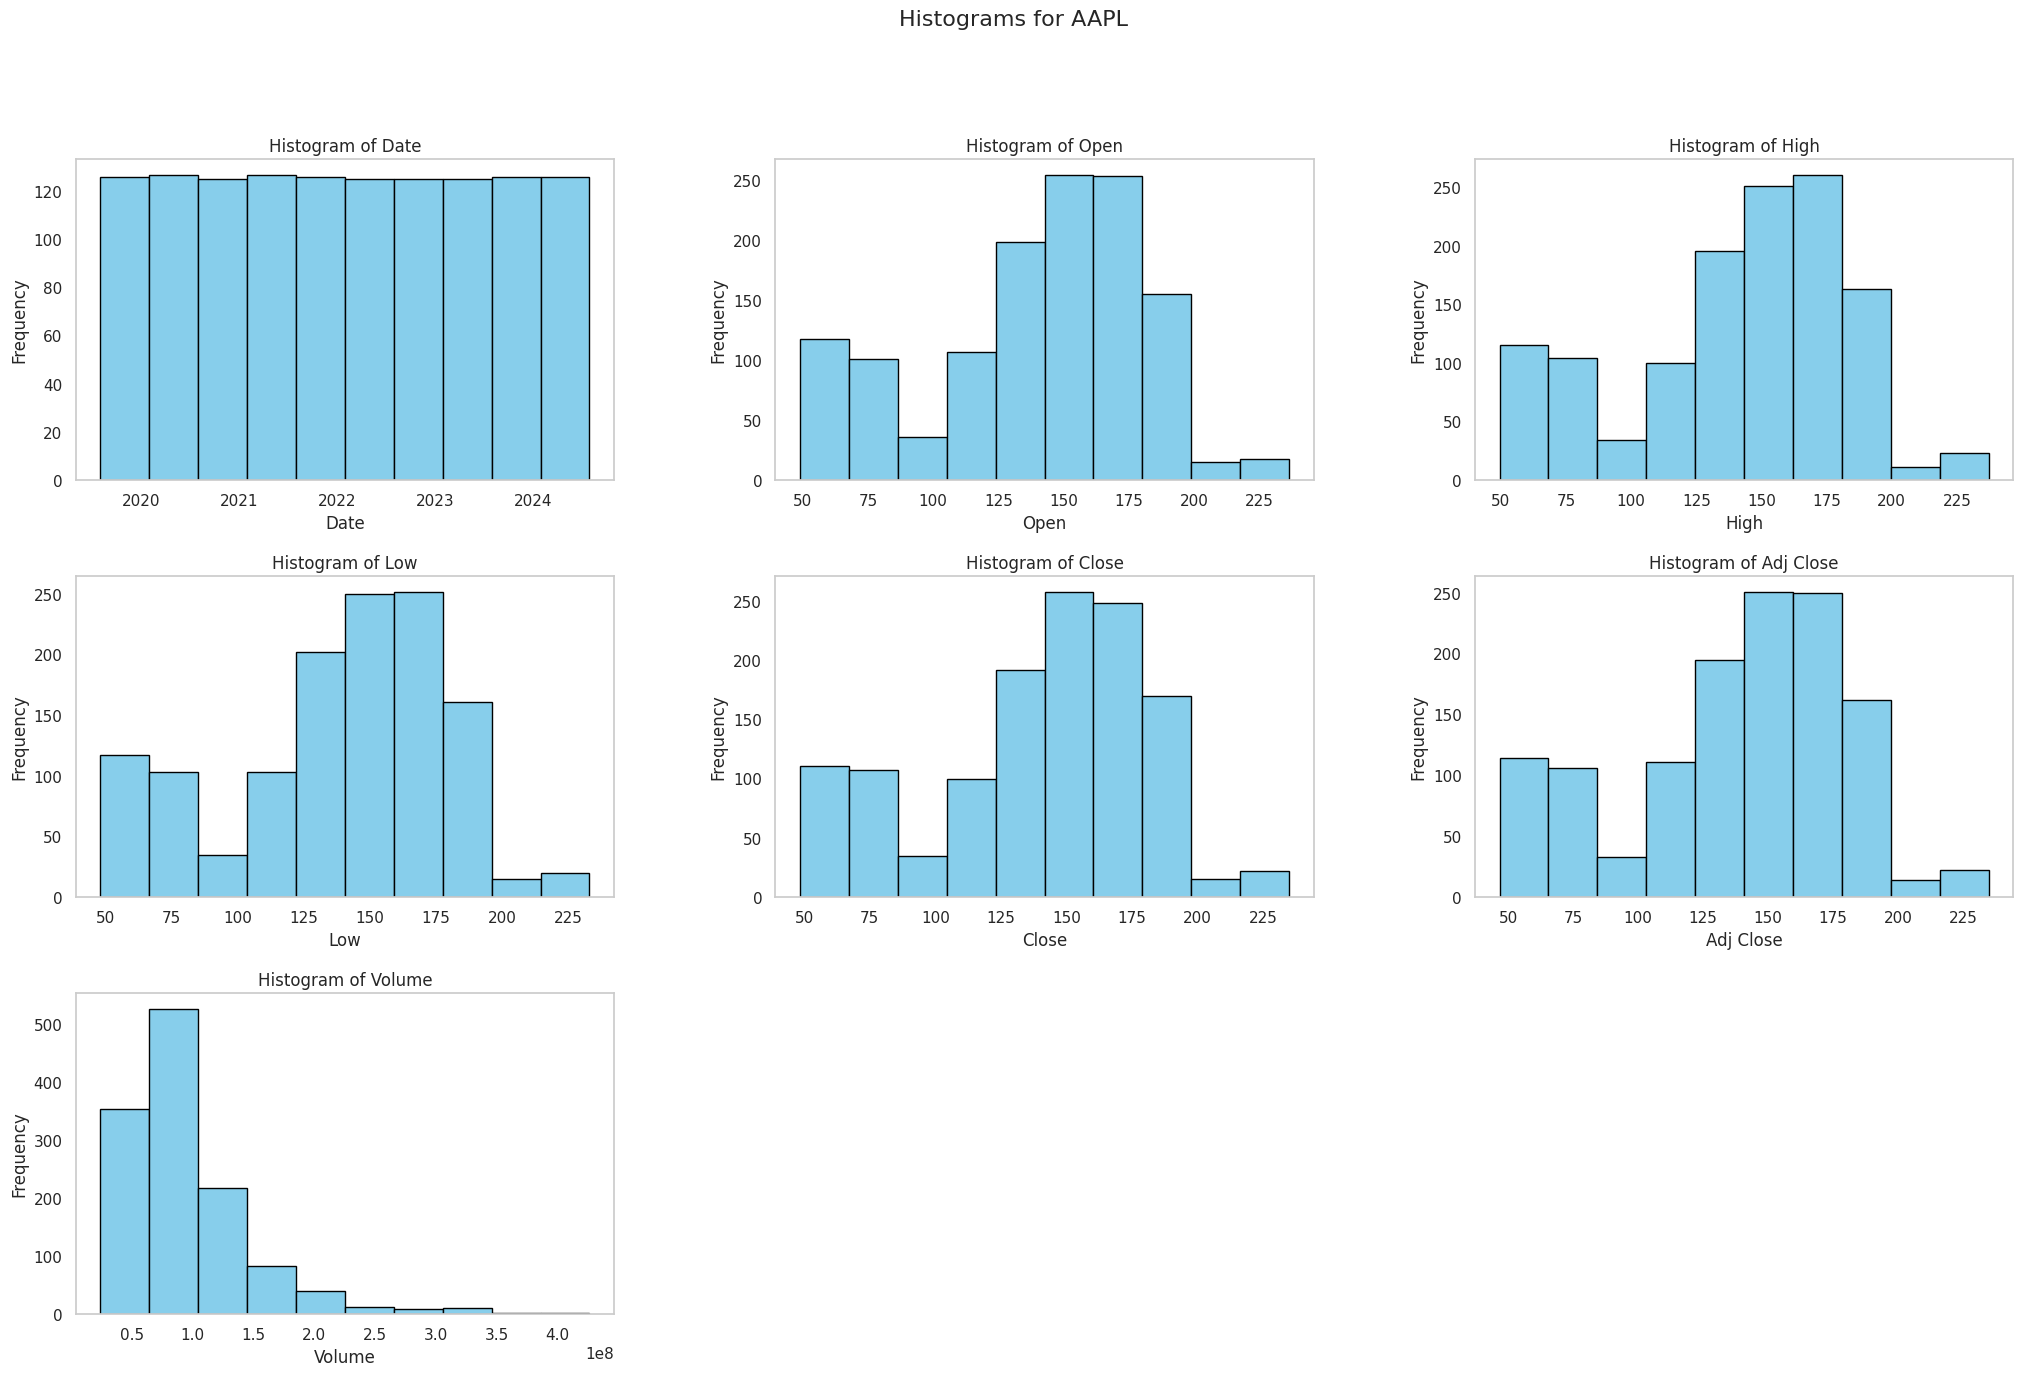

In [ ]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create histograms
aapl_data.hist(bins=10, figsize=(25, 15), color='skyblue', edgecolor='black', grid=False)

# Add labels and title
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_title())
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of ' + ax.get_title())

# Add overall title
plt.suptitle('Histograms for AAPL', fontsize=16)

# Show the plot
plt.show()

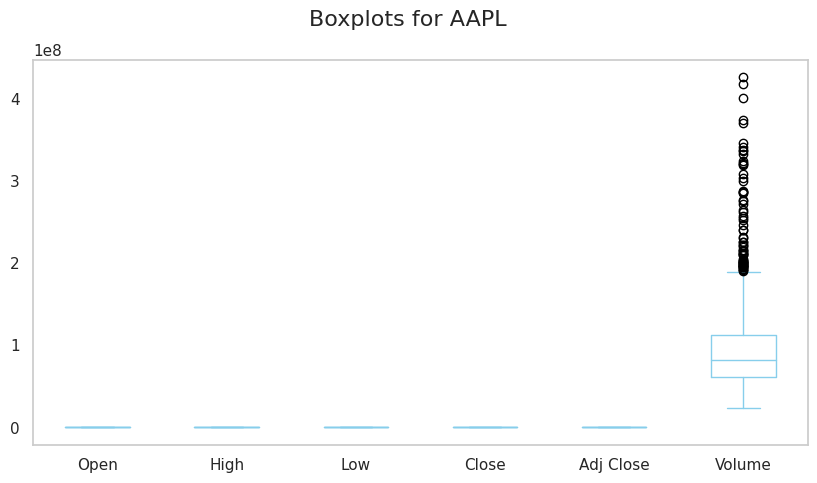

In [ ]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create histograms
aapl_data.boxplot(figsize=(10, 5), color='skyblue', grid=False)

# Add labels and title
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_title())

# Add overall title
plt.suptitle('Boxplots for AAPL', fontsize=16)

# Show the plot
plt.show()

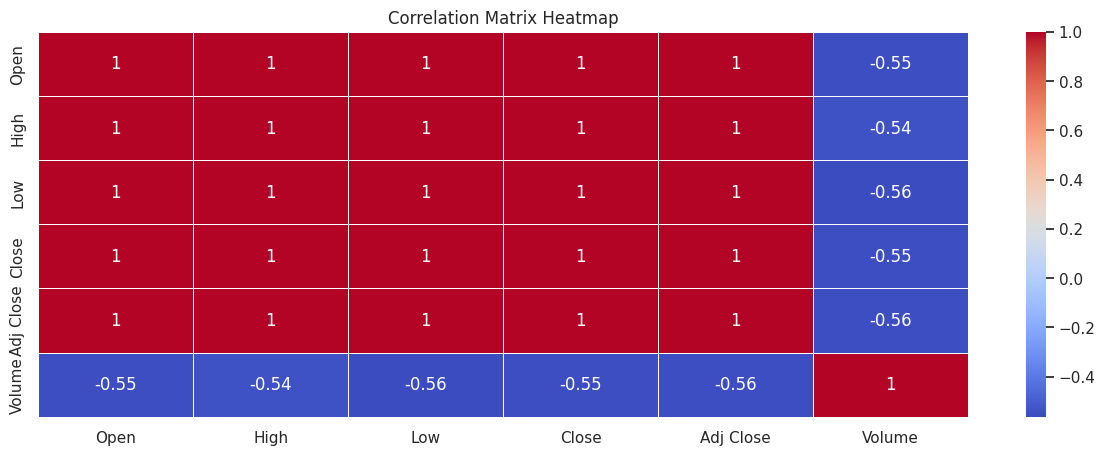

In [ ]:
# Filter the DataFrame to include only numeric columns
numeric_aapl_data = aapl_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_aapl_data.corr()

# Create a heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Analysis of EDA for AAPL

The focus of the analysis will only be on Adj Close as it is the only column which will be used for the model.

Through the histogram, it is noticed that the data is normally distributed. And through the boxplot, no outliers were noticed.


Through the correlation matrix, we notice that there is high correlation between Open, High, Low, Close, and Adj Close. This is logical considering they represent the same price of the stock but at different points in day.

## MSFT

In [ ]:
# Quick EDA
msft_data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,2022-01-27 06:08:35.103338752,270.454920,273.156868,267.645604,270.539579,265.821930,2.887071e+07
min,2019-07-31 00:00:00,133.300003,133.929993,130.779999,132.210007,126.088127,8.989200e+06
25%,2020-10-27 06:00:00,214.117504,216.272503,212.285004,214.250000,207.716553,2.098722e+07
50%,2022-01-26 12:00:00,261.080002,264.804993,258.335007,261.759995,256.975235,2.573990e+07
75%,2023-04-27 18:00:00,324.102501,327.660011,321.012489,323.980003,320.581703,3.312672e+07
max,2024-07-30 00:00:00,467.000000,468.350006,464.459991,467.559998,467.559998,9.701270e+07
std,NaN,79.985759,80.360456,79.469205,79.980456,81.595097,1.255200e+07


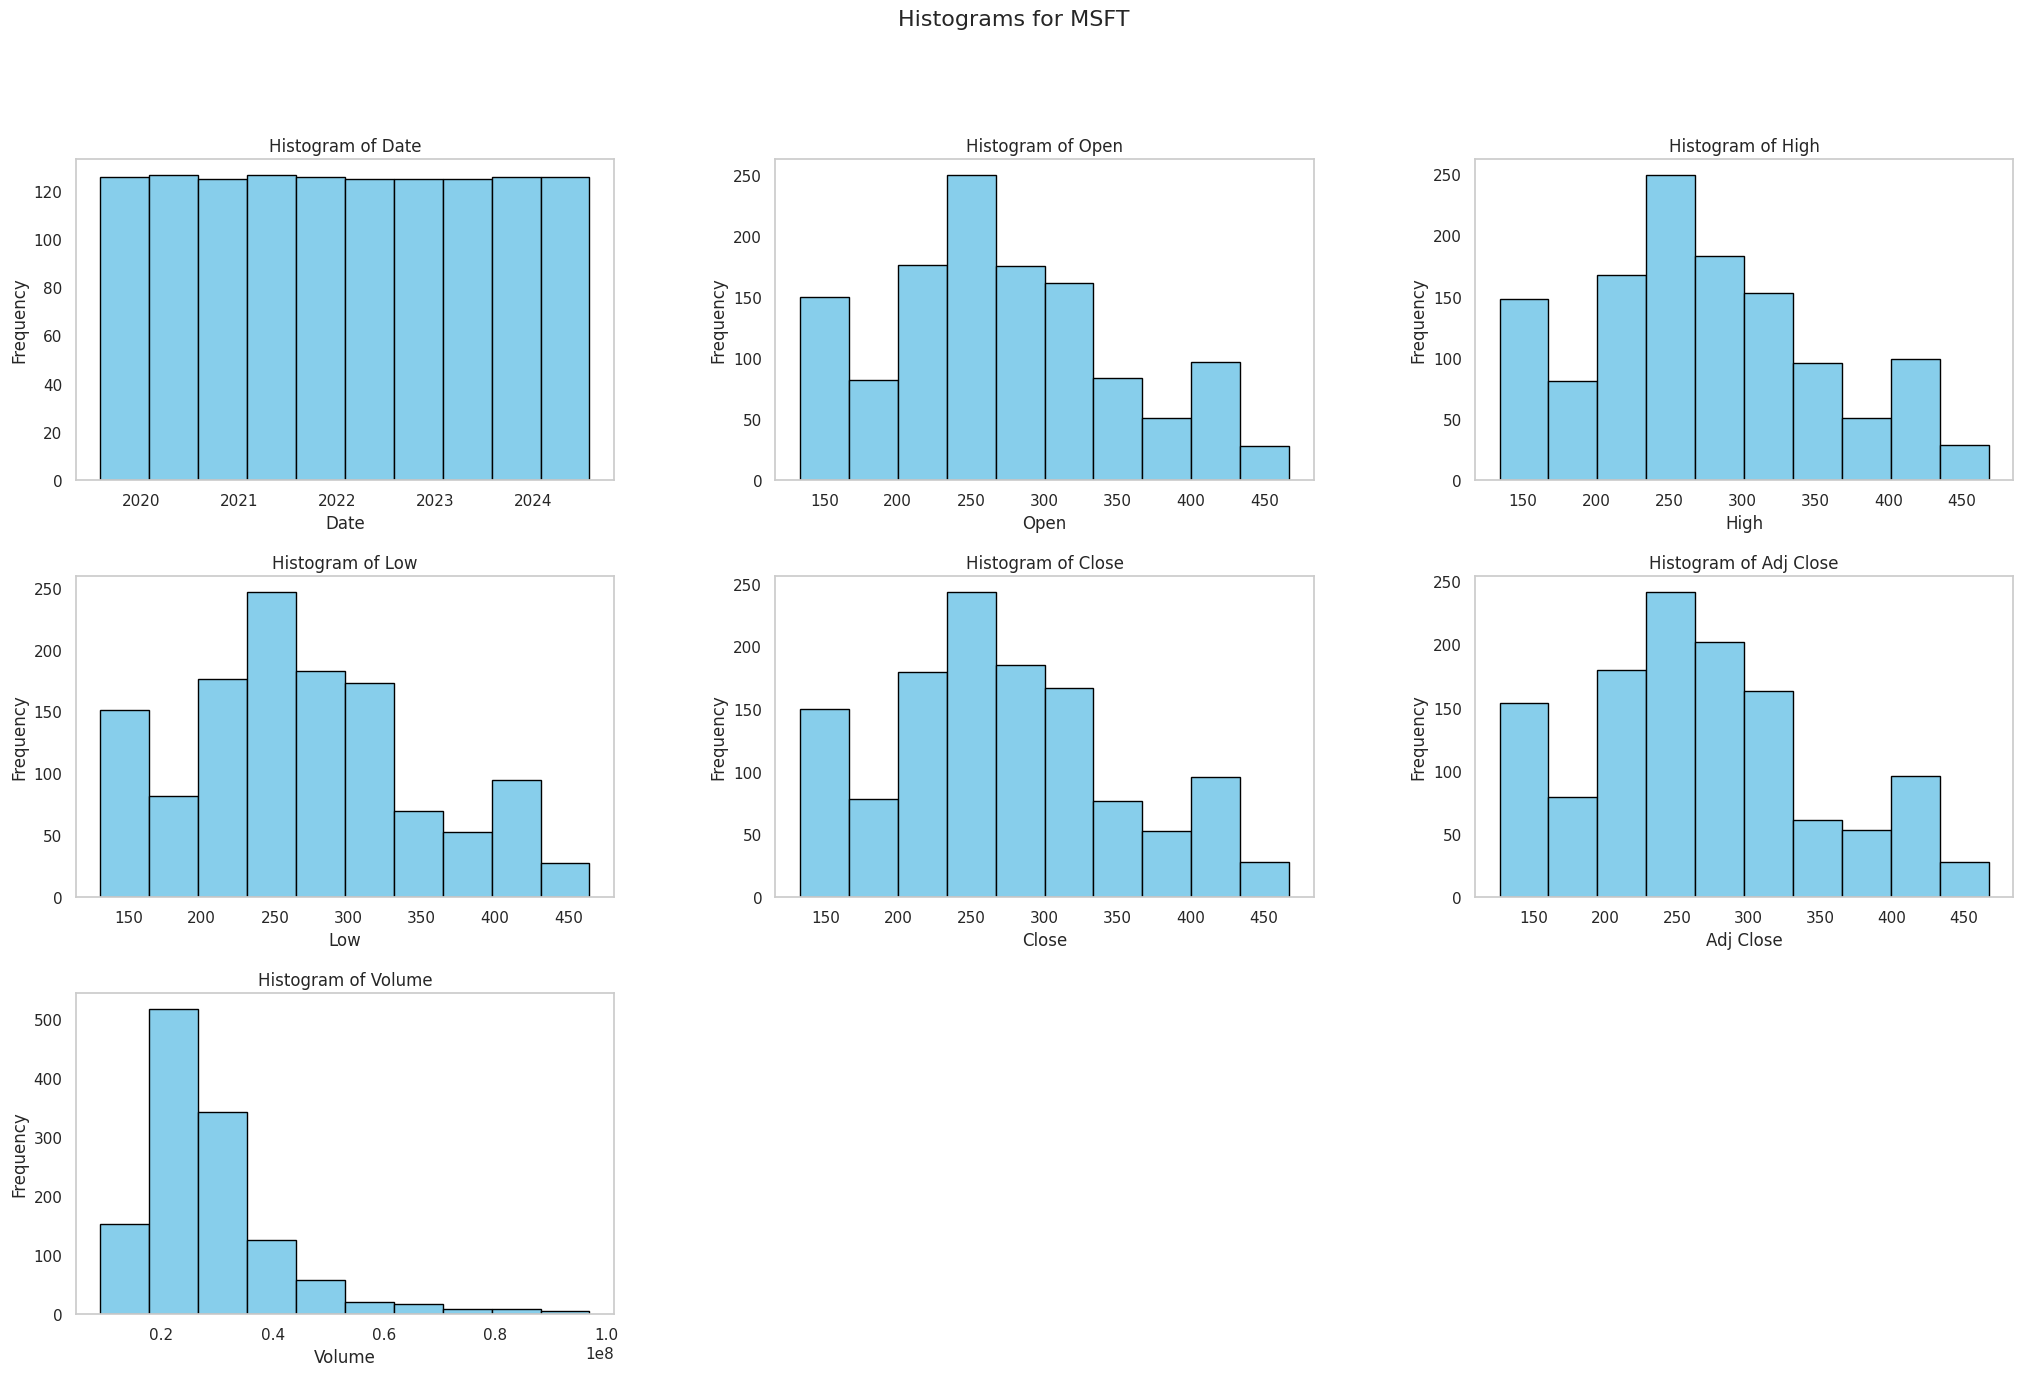

In [ ]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create histograms
msft_data.hist(bins=10, figsize=(25, 15), color='skyblue', edgecolor='black', grid=False)

# Add labels and title
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_title())
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of ' + ax.get_title())

# Add overall title
plt.suptitle('Histograms for MSFT', fontsize=16)

# Show the plot
plt.show()

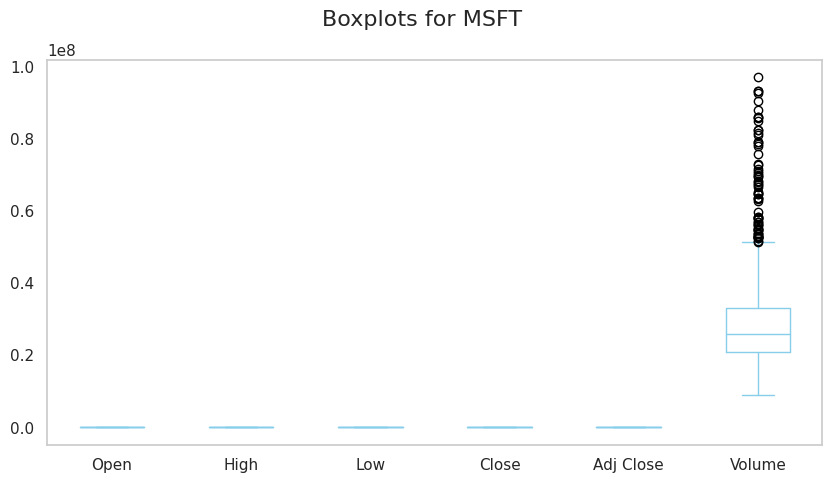

In [ ]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create histograms
msft_data.boxplot(figsize=(10, 5), color='skyblue', grid=False)

# Add labels and title
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_title())

# Add overall title
plt.suptitle('Boxplots for MSFT', fontsize=16)

# Show the plot
plt.show()

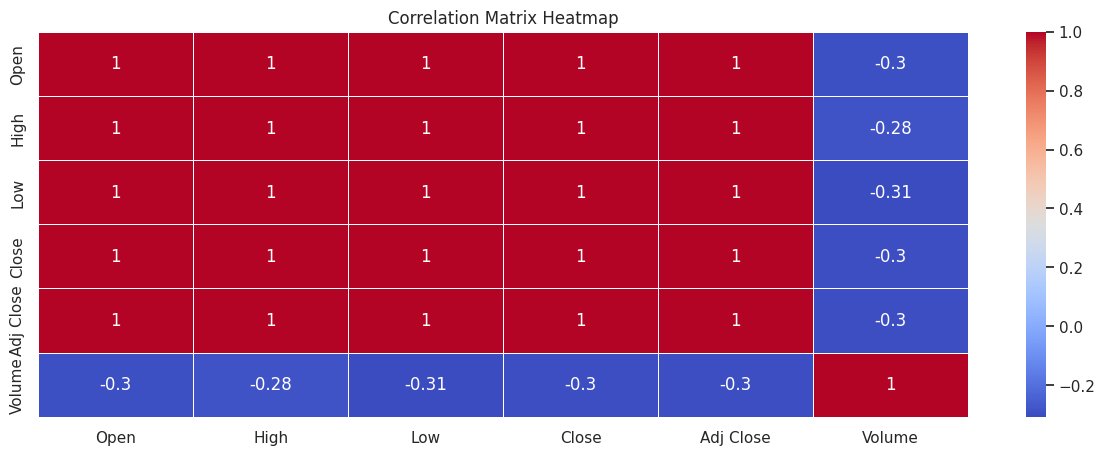

In [ ]:
# Filter the DataFrame to include only numeric columns
numeric_msft_data = msft_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_msft_data.corr()

# Create a heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Analysis of EDA for MSFT

The focus of the analysis will only be on Adj Close as it is the only column which will be used for the model.

Through the histogram, it is noticed that the data is slightly right-skewed. And through the boxplot, no outliers were noticed.

Through the correlation matrix, we notice that there is high correlation between Open, High, Low, Close, and Adj Close. This is logical considering they represent the same price of the stock but at different points in day.

# Trend, Cyclical Variation, and Irregular Events

## NVDA

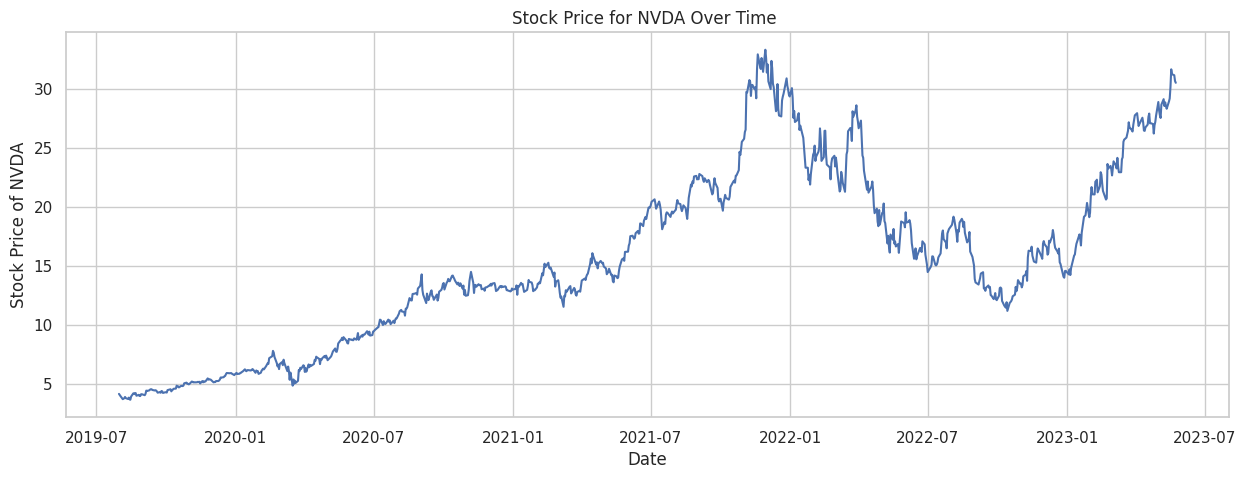

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(nvda_data['Date'], nvda_data['Adj Close'])
plt.title('Stock Price for NVDA Over Time ')
plt.xlabel('Date')
plt.ylabel('Stock Price of NVDA')
plt.show()

### Analysis of Trend, Cyclical Variation, and Irregular Events for NVDA

Through the graph, it is noticed that there appear to be cyclical variation, however with different peaks in different years.

Additionally, there appears to be no irregular event as the stock seems to be stable in growth and decrease.

The overall trend of the stock appears to be upwards, with a downward period noticed in 2022-2023.

## AAPL

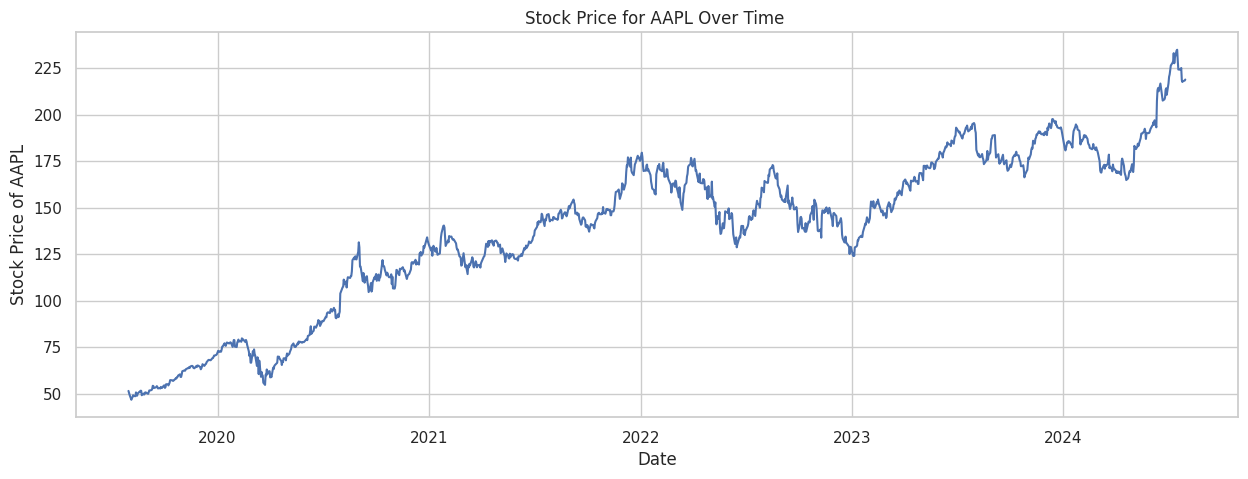

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(aapl_data['Date'], aapl_data['Adj Close'])
plt.title('Stock Price for AAPL Over Time ')
plt.xlabel('Date')
plt.ylabel('Stock Price of AAPL')
plt.show()

### Analysis of Trend, Cyclical Variation, and Irregular Events for AAPL

Through the graph, it is noticed that there appear to be cyclical variation with similar peaks through the years.

Additionally, there appears to be no irregular event as the stock seems to be stable in growth.

The overall trend of the stock appears to be upwards.

## MSFT

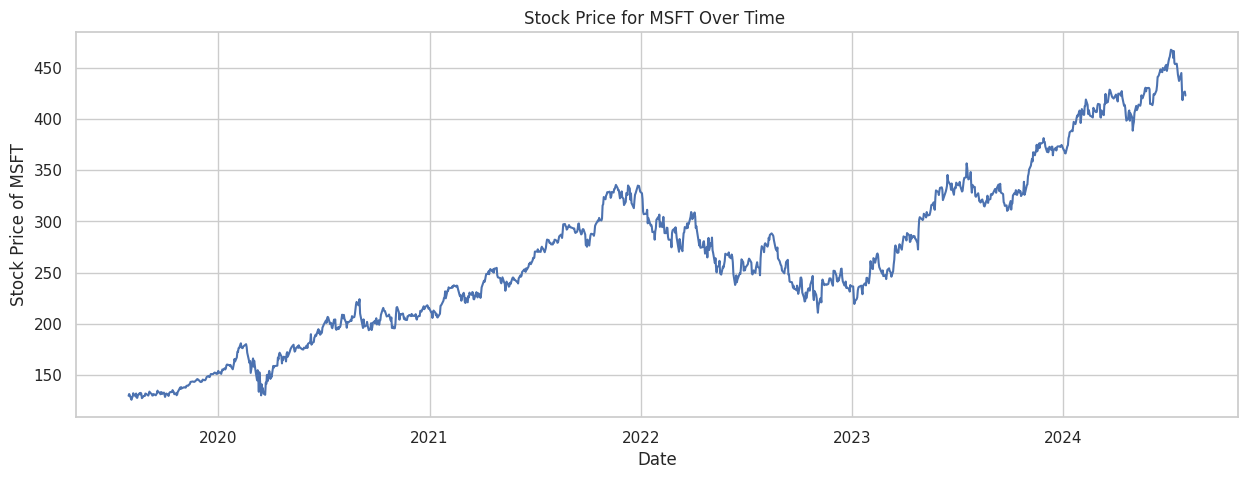

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(msft_data['Date'], msft_data['Adj Close'])
plt.title('Stock Price for MSFT Over Time ')
plt.xlabel('Date')
plt.ylabel('Stock Price of MSFT')
plt.show()

### Analysis of Trend, Cyclical Variation, and Irregular Events for MSFT

Through the graph, it is noticed that there appear to be cyclical variation with similar peaks through the years.

Additionally, there appears to be no irregular event as the stock seems to be stable in growth.

The overall trend of the stock appears to be upwards, although a slight downward trend was noticed from 2022 till 2024.

# Seasonality

## NVDA

<ipython-input-174-1887d383bf5a>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Average Price', data=monthly_avg_df, palette='viridis')


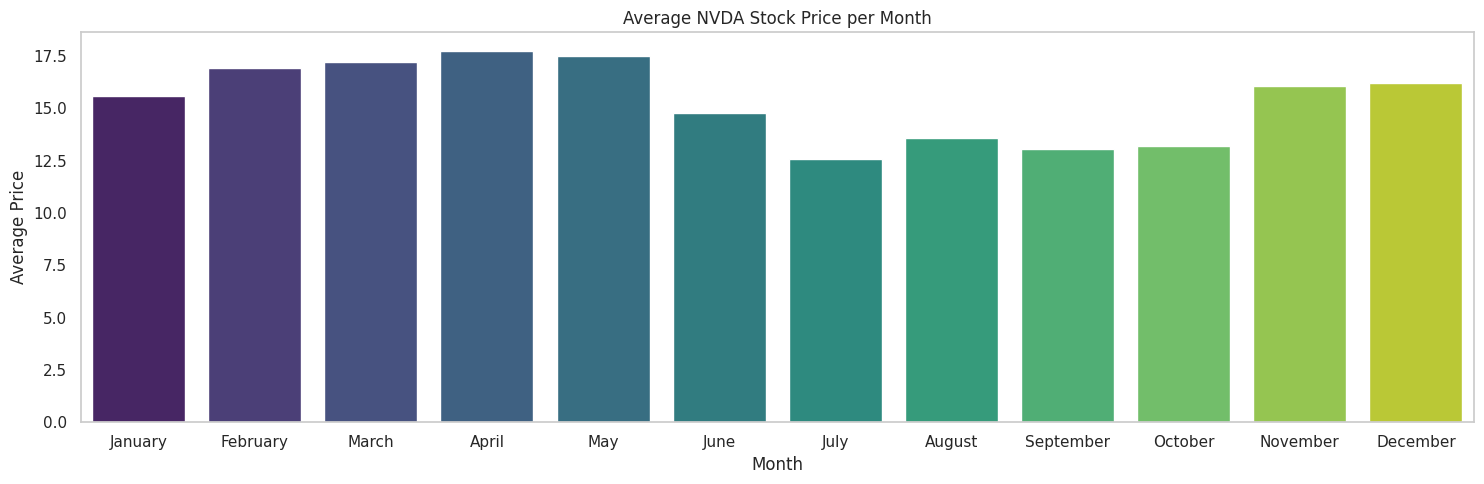

In [ ]:
# Make a copy of the DataFrame
nvda_data_copy = nvda_data.copy()

# Reset the index to ensure 'Date' column is present
nvda_data_copy.reset_index(inplace=True)

# Ensure the 'Date' column is converted to datetime and set it as the index
nvda_data_copy['Date'] = pd.to_datetime(nvda_data_copy['Date'])
nvda_data_copy.set_index('Date', inplace=True)

# Use the 'Adj Close' column for analysis and drop any rows with missing values
nvda_data_copy = nvda_data_copy[['Adj Close']].dropna()

# Resample data to monthly frequency and take the mean of each month
nvda_monthly = nvda_data_copy.resample('M').mean()

# Extract month names and average prices
nvda_monthly['Month'] = nvda_monthly.index.month_name()
monthly_avg_prices = nvda_monthly.groupby('Month')['Adj Close'].mean()

# Order months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_prices = monthly_avg_prices.reindex(month_order)

# Create a new DataFrame for plotting
monthly_avg_df = pd.DataFrame({'Month': month_order, 'Average Price': monthly_avg_prices.values})

# Plot the average prices by month
plt.figure(figsize=(15, 5))
sns.barplot(x='Month', y='Average Price', data=monthly_avg_df, palette='viridis')
plt.title('Average NVDA Stock Price per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Analysis of Seasonality for NVDA

Through the graph, it is noticed that NVDA stock prices tend to be higher in April and May. And they are the lowest in September and October.

## AAPL

<ipython-input-175-9a93c045c863>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Average Price', data=monthly_avg_df, palette='viridis')


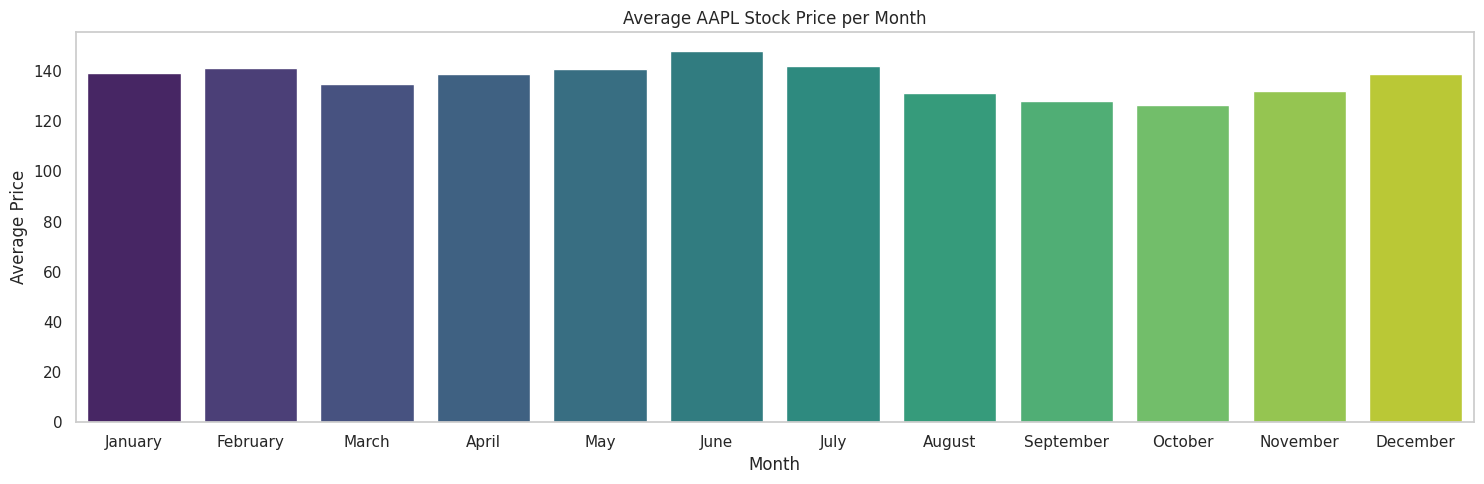

In [ ]:
# Make a copy of the DataFrame
aapl_data_copy = aapl_data.copy()

# Reset the index to ensure 'Date' column is present
aapl_data_copy.reset_index(inplace=True)

# Ensure the 'Date' column is converted to datetime and set it as the index
aapl_data_copy['Date'] = pd.to_datetime(aapl_data_copy['Date'])
aapl_data_copy.set_index('Date', inplace=True)

# Use the 'Adj Close' column for analysis and drop any rows with missing values
aapl_data_copy = aapl_data_copy[['Adj Close']].dropna()

# Resample data to monthly frequency and take the mean of each month
aapl_monthly = aapl_data_copy.resample('M').mean()

# Extract month names and average prices
aapl_monthly['Month'] = aapl_monthly.index.month_name()
monthly_avg_prices = aapl_monthly.groupby('Month')['Adj Close'].mean()

# Order months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_prices = monthly_avg_prices.reindex(month_order)

# Create a new DataFrame for plotting
monthly_avg_df = pd.DataFrame({'Month': month_order, 'Average Price': monthly_avg_prices.values})

# Plot the average prices by month
plt.figure(figsize=(15, 5))
sns.barplot(x='Month', y='Average Price', data=monthly_avg_df, palette='viridis')
plt.title('Average AAPL Stock Price per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Analysis of Seasonality for AAPL

Through the graph, it is noticed that AAPL stock prices tend to be higher in June, which could be due to the launch of their new products. And they are the lowest in September and October.

## MSFT

<ipython-input-176-832e209e21e7>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Average Price', data=monthly_avg_df, palette='viridis')


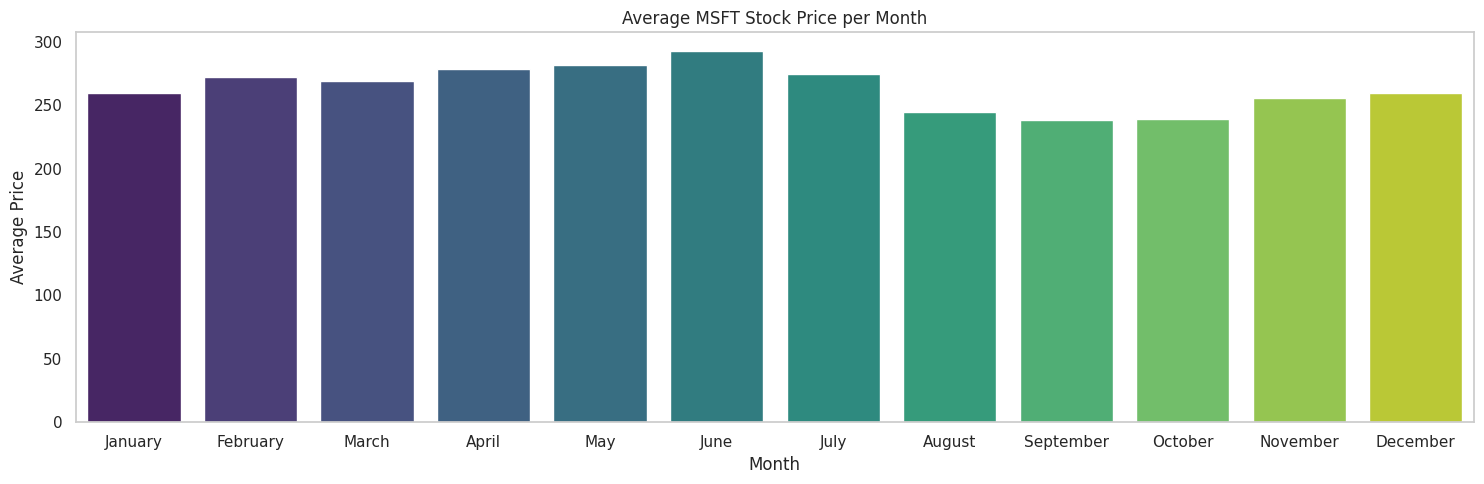

In [ ]:
# Make a copy of the DataFrame
msft_data_copy = msft_data.copy()

# Reset the index to ensure 'Date' column is present
msft_data_copy.reset_index(inplace=True)

# Ensure the 'Date' column is converted to datetime and set it as the index
msft_data_copy['Date'] = pd.to_datetime(msft_data_copy['Date'])
msft_data_copy.set_index('Date', inplace=True)

# Use the 'Adj Close' column for analysis and drop any rows with missing values
msft_data_copy = msft_data_copy[['Adj Close']].dropna()

# Resample data to monthly frequency and take the mean of each month
msft_monthly = msft_data_copy.resample('M').mean()

# Extract month names and average prices
msft_monthly['Month'] = msft_monthly.index.month_name()
monthly_avg_prices = msft_monthly.groupby('Month')['Adj Close'].mean()

# Order months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_prices = monthly_avg_prices.reindex(month_order)

# Create a new DataFrame for plotting
monthly_avg_df = pd.DataFrame({'Month': month_order, 'Average Price': monthly_avg_prices.values})

# Plot the average prices by month
plt.figure(figsize=(15, 5))
sns.barplot(x='Month', y='Average Price', data=monthly_avg_df, palette='viridis')
plt.title('Average MSFT Stock Price per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Analysis of Seasonality for MSFT

Through the graph, it is noticed that MSFT stock prices tend to be higher in June. And they are the lowest in September and October.

It is also noticeable that the three stocks appear to be the lowest in September and October, this could be a signal that the tech industry tends to be the lowest in September and October.

# ARIMA Model

## NVDA

In [ ]:
nvda_data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
957,2023-05-18,30.410000,31.827999,30.320000,31.677999,31.665241,748725000
958,2023-05-19,31.535999,31.580000,30.916000,31.264000,31.251408,473908000
959,2023-05-22,30.900999,31.520000,30.680000,31.176001,31.163445,372000000
960,2023-05-23,31.000000,31.288000,30.631001,30.688000,30.675642,356253000
961,2023-05-24,30.209999,30.607000,29.806000,30.538000,30.525702,721419000


In [ ]:
#Train-test split
train_size = int(len(nvda_data) * 0.8)
train, test = nvda_data[:train_size], nvda_data[train_size:]

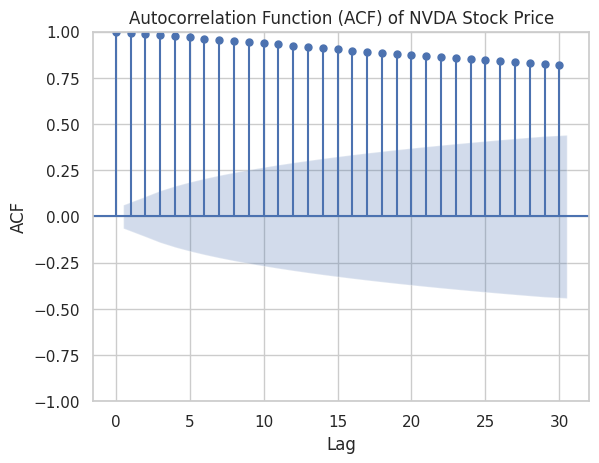

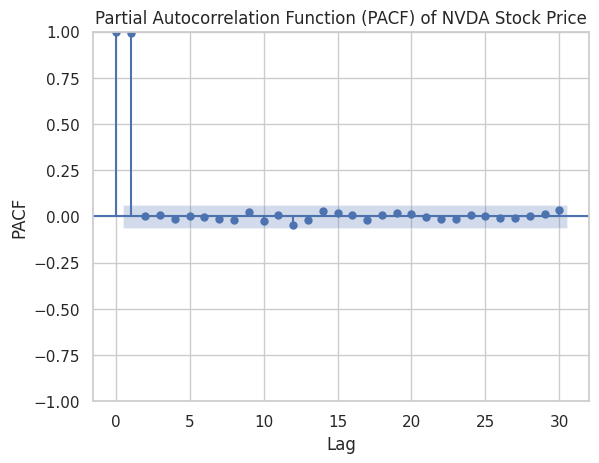

In [ ]:
plot_acf(nvda_data['Adj Close'])
plt.title('Autocorrelation Function (ACF) of NVDA Stock Price')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plot_pacf(nvda_data['Adj Close'])
plt.title('Partial Autocorrelation Function (PACF) of NVDA Stock Price')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

### Model 1

Root Mean Squared Error (RMSE): 6.7279990209018194


<ipython-input-180-14b877a204b9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions
<ipython-input-180-14b877a204b9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['residuals'] = test['Adj Close'] - test['predictions']


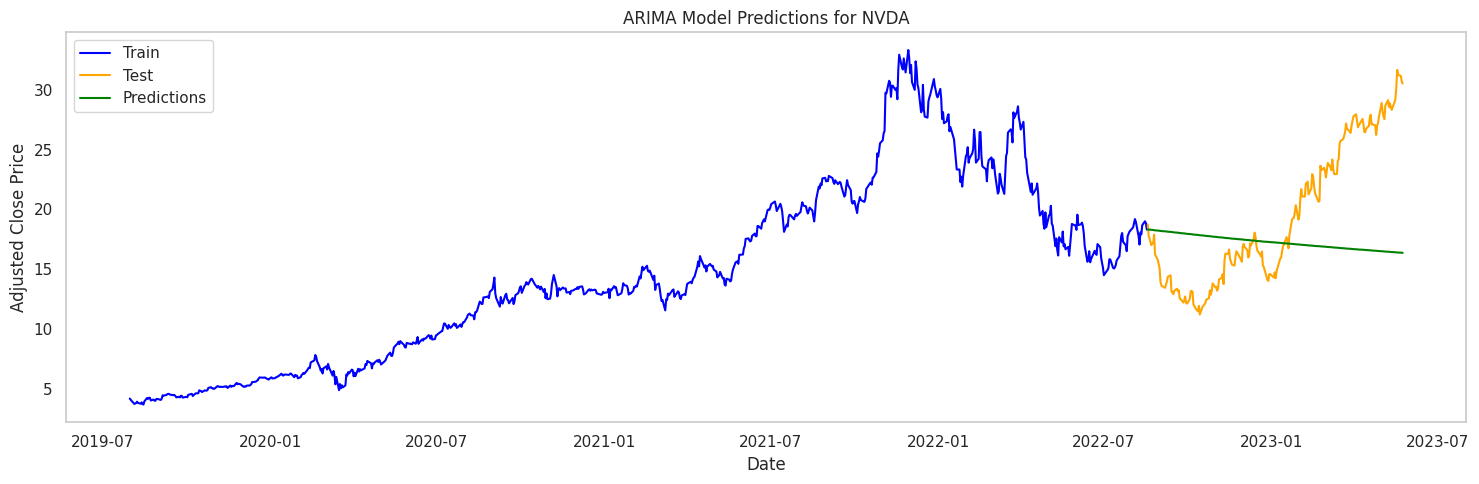

In [ ]:
order = (1, 0, 1) #from pacf we get p, from acf we get q
model = ARIMA(train['Adj Close'], order=order)
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(test))

rmse = sqrt(mean_squared_error(test['Adj Close'], predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

test['predictions'] = predictions
test['residuals'] = test['Adj Close'] - test['predictions']


plt.figure(figsize=(15, 5))
sns.lineplot(data=train, x='Date', y='Adj Close', label='Train', color='blue')
sns.lineplot(data=test, x='Date', y='Adj Close', label='Test', color='orange')
sns.lineplot(x=test['Date'], y=test['predictions'], label='Predictions', color='green')
plt.title('ARIMA Model Predictions for NVDA')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
test.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,predictions,residuals
769,2022-08-18,18.301001,18.865000,18.183001,18.773001,18.751881,415447000,18.331673,0.420208
770,2022-08-19,18.406000,18.520000,17.770000,17.849001,17.828924,441588000,18.318907,-0.489983
771,2022-08-22,17.490000,17.558001,16.966000,17.034000,17.014839,409593000,18.306172,-1.291333
772,2022-08-23,16.989000,17.465000,16.969999,17.181000,17.161673,369986000,18.293469,-1.131797
773,2022-08-24,17.011999,17.406000,16.895000,17.222000,17.202629,522661000,18.280797,-1.078168


<Axes: >

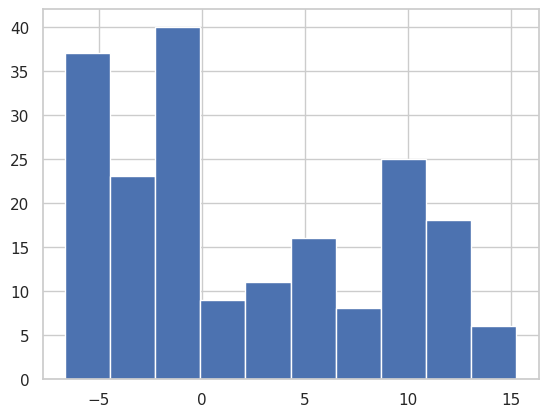

In [ ]:
test['residuals'].hist()

In [ ]:
test['residuals'].mean()

2.1678694317608755

### Model 2

ADF Statistic: -1.0999542171582004
p-value: 0.7150901624879049


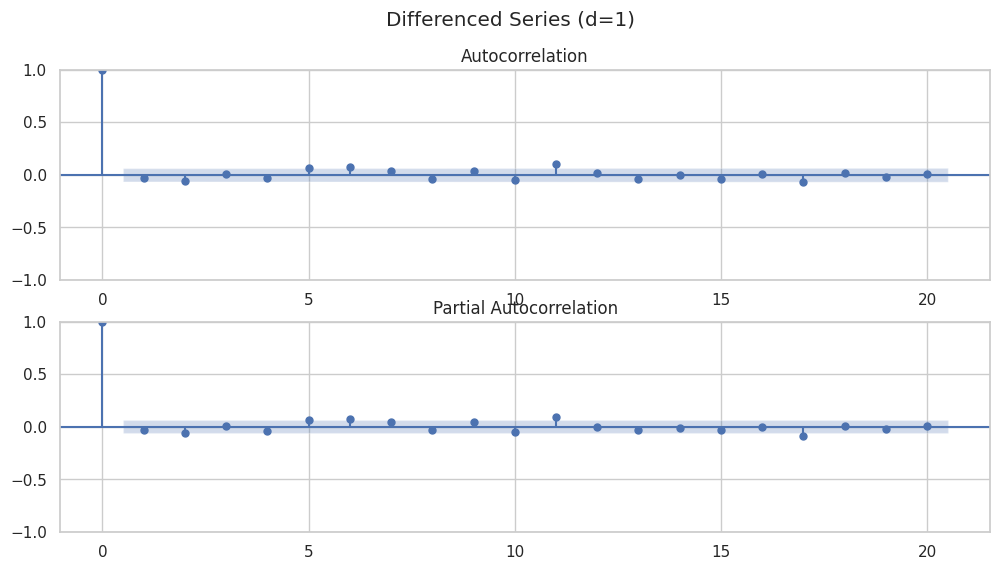

Ideal d: 1


In [ ]:
adf_result = adfuller(nvda_data['Adj Close'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# If not stationary, apply differencing
d = 0
while adf_result[1] > 0.05:
    d += 1
    differenced_data = np.diff(nvda_data['Adj Close'], n=d)
    adf_result = adfuller(differenced_data)

    # Plot ACF and PACF of the differenced series
    plt.figure(figsize=(12, 6))
    plot_acf(differenced_data, lags=20, ax=plt.subplot(211))
    plot_pacf(differenced_data, lags=20, ax=plt.subplot(212))
    plt.suptitle(f'Differenced Series (d={d})')
    plt.show()

print(f'Ideal d: {d}')

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-185-e3305e4ecde2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions
<ipython-input-185-e3305e4ecde2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['residuals'] = test['Adj Close'] - test['predictions']


Root Mean Squared Error (RMSE): 6.77113729703903


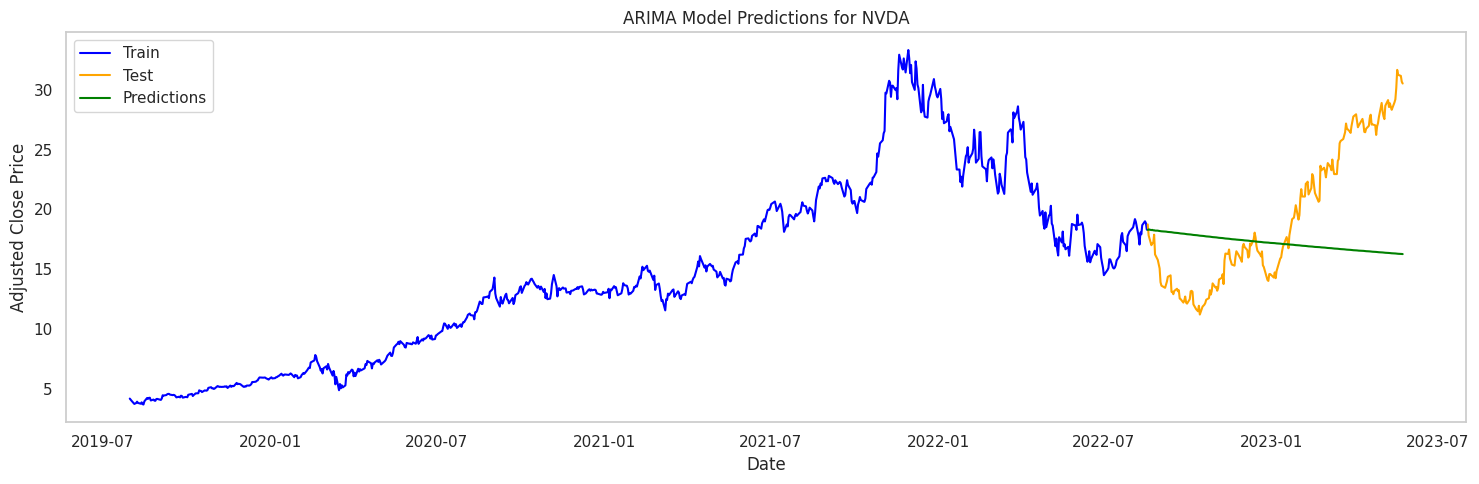

In [ ]:
order = (6, 0, 1) #from adf, we get p, q, and d
model = ARIMA(train['Adj Close'], order=order)
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(test))

rmse = sqrt(mean_squared_error(test['Adj Close'], predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

test['predictions'] = predictions
test['residuals'] = test['Adj Close'] - test['predictions']


plt.figure(figsize=(15, 5))
sns.lineplot(data=train, x='Date', y='Adj Close', label='Train', color='blue')
sns.lineplot(data=test, x='Date', y='Adj Close', label='Test', color='orange')
sns.lineplot(x=test['Date'], y=test['predictions'], label='Predictions', color='green')
plt.title('ARIMA Model Predictions for NVDA')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
test.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,predictions,residuals
769,2022-08-18,18.301001,18.865000,18.183001,18.773001,18.751881,415447000,18.292666,0.459215
770,2022-08-19,18.406000,18.520000,17.770000,17.849001,17.828924,441588000,18.330534,-0.501610
771,2022-08-22,17.490000,17.558001,16.966000,17.034000,17.014839,409593000,18.276441,-1.261602
772,2022-08-23,16.989000,17.465000,16.969999,17.181000,17.161673,369986000,18.293911,-1.132238
773,2022-08-24,17.011999,17.406000,16.895000,17.222000,17.202629,522661000,18.254602,-1.051973


<Axes: >

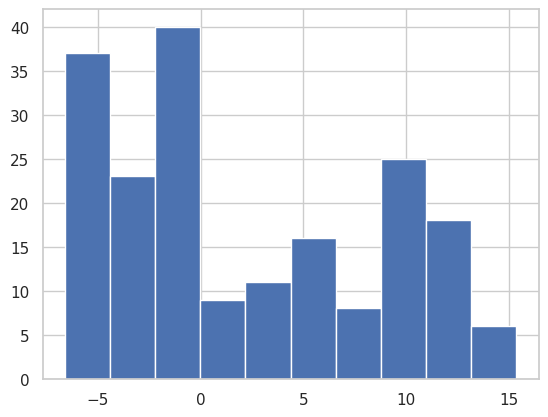

In [ ]:
test['residuals'].hist()

In [ ]:
test['residuals'].mean()

2.229861009490714

### Analysis of ARIMA Models of NVDA

The first ARIMA model for NVDA was with the order (1,0,1), the p was determined utilizing the pacf, the q was determined utilizing the acf, while the d was assumed as 1.

This resulted in an RMSE score of 6.73.

The residual histogram was noticed to be slightly right-skewed, with a mean of 2.17. The positive mean suggests that the predictions were lower than actual values.

The second ARIMA model for NVDA was with the order (6,0,1), the p was determined utilizing the pacf after differencing, the q was determined utilzing the acf after differencing, and the ideal d was suggested as 1. Although the pacf suggest the p to be zero or one, I had decided to choose 6 in order to improve the model.

This resulted in an RMSE score of 6.77, which is slightly worse than model 1.

The residual histogram remained similar, while the mean had slightly changed to 2.22.

## AAPL

In [ ]:
aapl_data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.539993,61777600
1254,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.490005,51391200
1255,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.960007,41601300
1256,2024-07-29,216.960007,219.300003,215.750000,218.240005,218.240005,36311800
1257,2024-07-30,219.190002,220.330002,216.119995,218.800003,218.800003,41643800


In [ ]:
#Train-test split
train_size = int(len(aapl_data) * 0.8)
train, test = aapl_data[:train_size], aapl_data[train_size:]

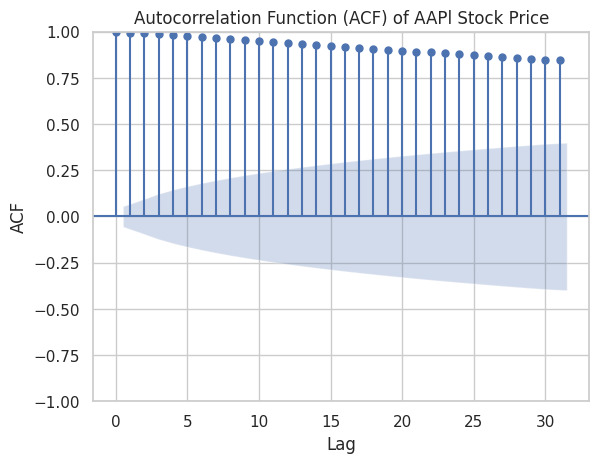

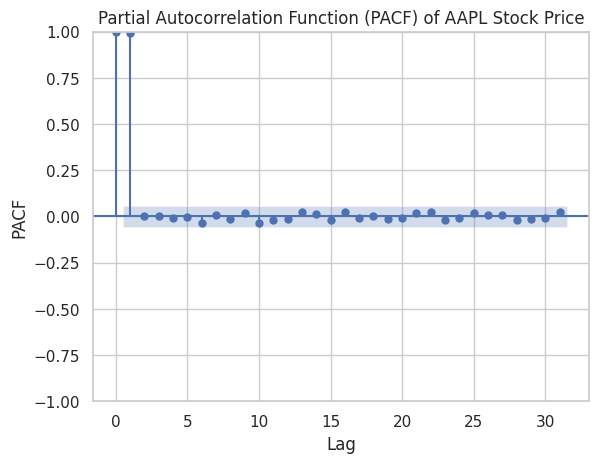

In [ ]:
plot_acf(aapl_data['Adj Close'])
plt.title('Autocorrelation Function (ACF) of AAPl Stock Price')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plot_pacf(aapl_data['Adj Close'])
plt.title('Partial Autocorrelation Function (PACF) of AAPL Stock Price')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

### Model 1

Root Mean Squared Error (RMSE): 18.22397924133298


<ipython-input-192-8d0509289fce>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions
<ipython-input-192-8d0509289fce>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['residuals'] = test['Adj Close'] - test['predictions']


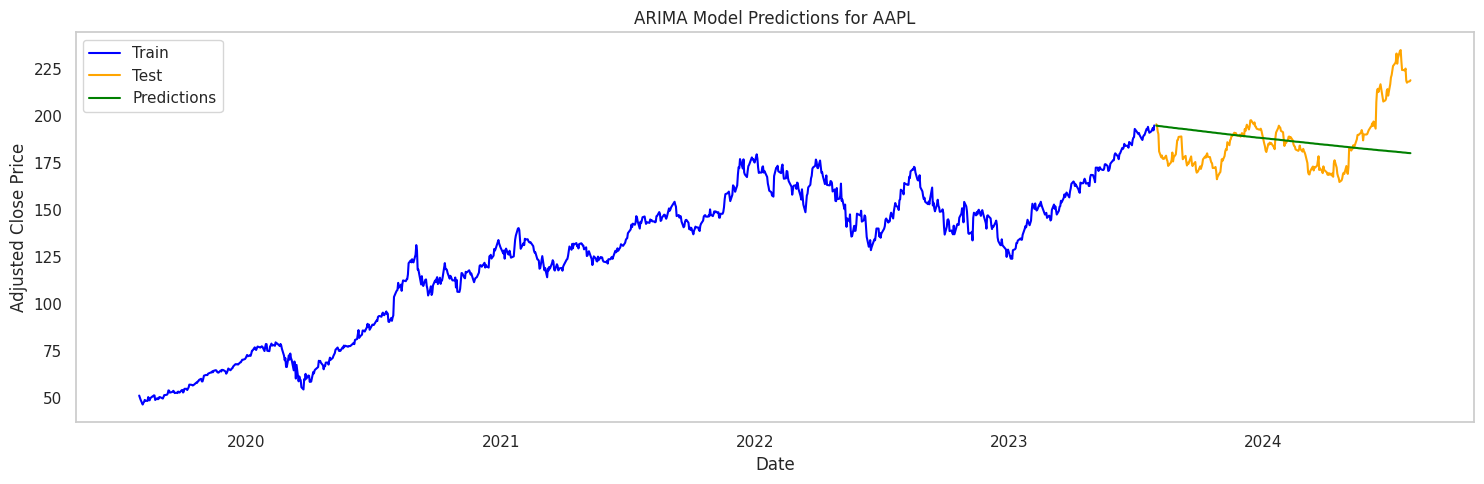

In [ ]:
order = (1, 0, 0) #from pacf we get p, from acf we get q
model = ARIMA(train['Adj Close'], order=order)
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(test))

rmse = sqrt(mean_squared_error(test['Adj Close'], predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

test['predictions'] = predictions
test['residuals'] = test['Adj Close'] - test['predictions']


plt.figure(figsize=(15, 5))
sns.lineplot(data=train, x='Date', y='Adj Close', label='Train', color='blue')
sns.lineplot(data=test, x='Date', y='Adj Close', label='Test', color='orange')
sns.lineplot(x=test['Date'], y=test['predictions'], label='Predictions', color='green')
plt.title('ARIMA Model Predictions for AAPL')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
test.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,predictions,residuals
1006,2023-07-31,196.059998,196.490005,195.259995,196.449997,195.412216,38824100,194.729880,0.682337
1007,2023-08-01,196.240005,196.729996,195.279999,195.610001,194.576660,35175100,194.664350,-0.087690
1008,2023-08-02,195.039993,195.179993,191.850006,192.580002,191.562668,50389300,194.598883,-3.036215
1009,2023-08-03,191.570007,192.369995,190.690002,191.169998,190.160126,61235200,194.533479,-4.373353
1010,2023-08-04,185.520004,187.380005,181.919998,181.990005,181.028595,115799700,194.468136,-13.439541


<Axes: >

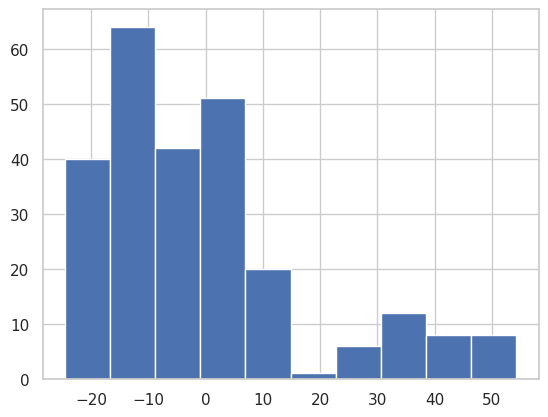

In [ ]:
test['residuals'].hist()

In [ ]:
test['residuals'].mean()

-0.6351437709516561

### Model 2

ADF Statistic: -1.1907822313366694
p-value: 0.6775483406155399


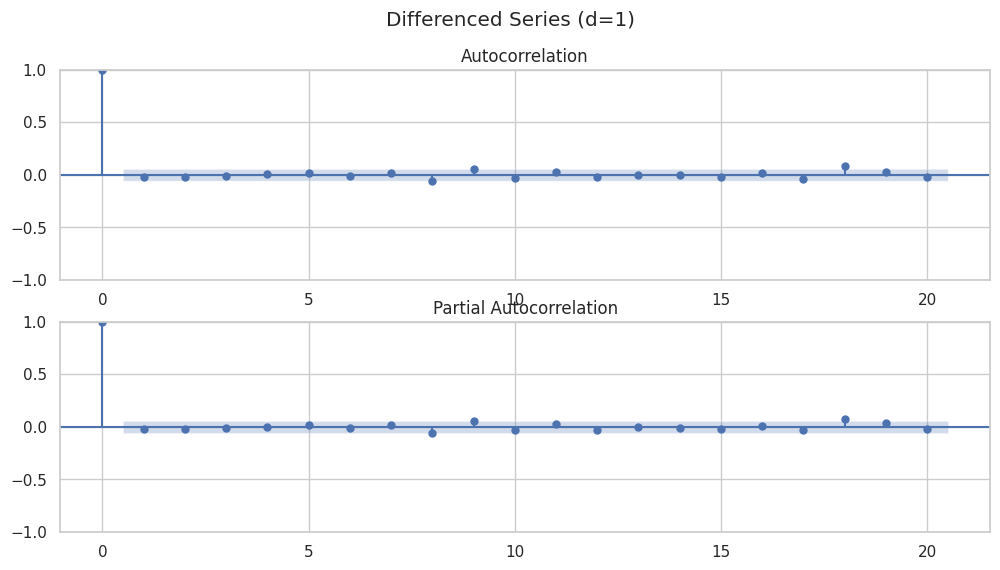

Ideal d: 1


In [ ]:
adf_result = adfuller(aapl_data['Adj Close'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# If not stationary, apply differencing
d = 0
while adf_result[1] > 0.05:
    d += 1
    differenced_data = np.diff(aapl_data['Adj Close'], n=d)
    adf_result = adfuller(differenced_data)

    # Plot ACF and PACF of the differenced series
    plt.figure(figsize=(12, 6))
    plot_acf(differenced_data, lags=20, ax=plt.subplot(211))
    plot_pacf(differenced_data, lags=20, ax=plt.subplot(212))
    plt.suptitle(f'Differenced Series (d={d})')
    plt.show()

print(f'Ideal d: {d}')

Root Mean Squared Error (RMSE): 17.955415860414224


<ipython-input-197-772cb8f5cdb5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions
<ipython-input-197-772cb8f5cdb5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['residuals'] = test['Adj Close'] - test['predictions']


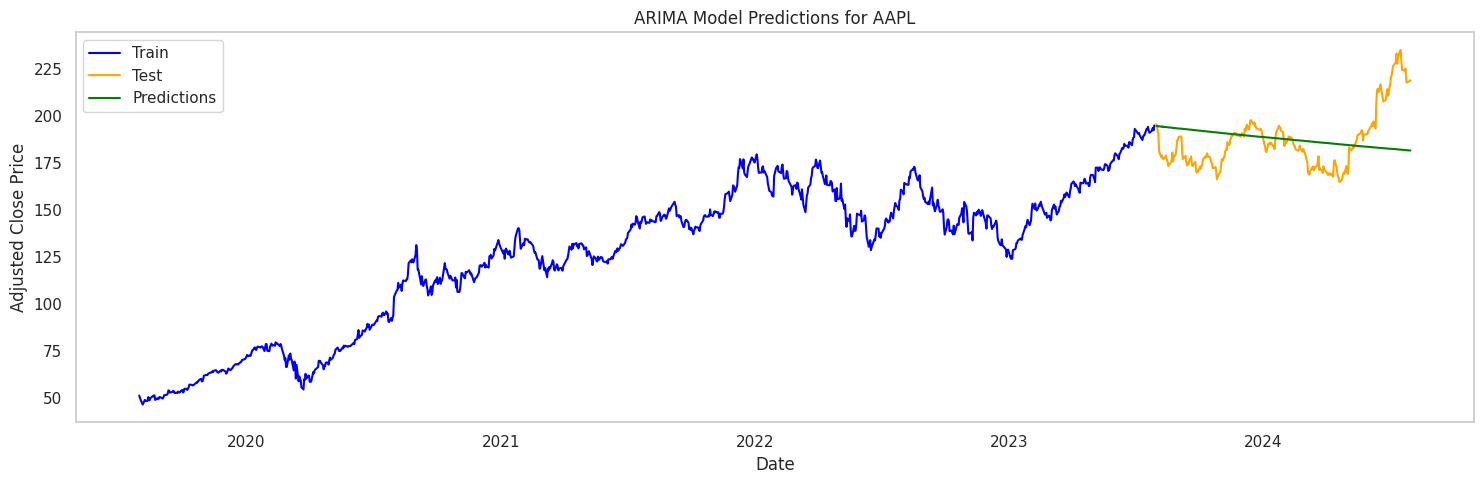

In [ ]:
order = (9, 0, 1) #from adf, we get p, q, and d
model = ARIMA(train['Adj Close'], order=order)
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(test))

rmse = sqrt(mean_squared_error(test['Adj Close'], predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

test['predictions'] = predictions
test['residuals'] = test['Adj Close'] - test['predictions']


plt.figure(figsize=(15, 5))
sns.lineplot(data=train, x='Date', y='Adj Close', label='Train', color='blue')
sns.lineplot(data=test, x='Date', y='Adj Close', label='Test', color='orange')
sns.lineplot(x=test['Date'], y=test['predictions'], label='Predictions', color='green')
plt.title('ARIMA Model Predictions for AAPL')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
test.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,predictions,residuals
1006,2023-07-31,196.059998,196.490005,195.259995,196.449997,195.412216,38824100,194.424833,0.987383
1007,2023-08-01,196.240005,196.729996,195.279999,195.610001,194.576660,35175100,194.532225,0.044435
1008,2023-08-02,195.039993,195.179993,191.850006,192.580002,191.562668,50389300,194.414457,-2.851789
1009,2023-08-03,191.570007,192.369995,190.690002,191.169998,190.160126,61235200,194.295867,-4.135741
1010,2023-08-04,185.520004,187.380005,181.919998,181.990005,181.028595,115799700,194.355555,-13.326960


<Axes: >

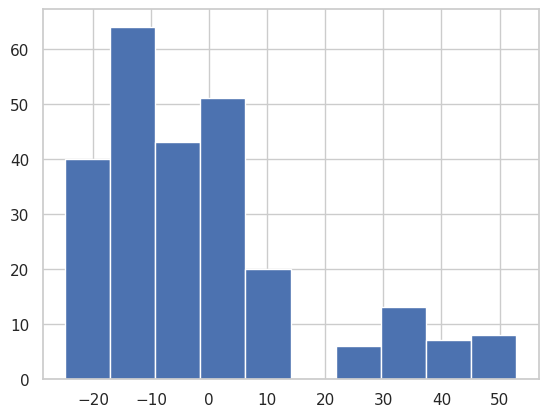

In [ ]:
test['residuals'].hist()

In [ ]:
test['residuals'].mean()

-1.3045039339224702

### Analysis of ARIMA Models of AAPL

The first ARIMA model for AAPL was with the order (1,0,0), the p was determined utilizing the pacf, the q was determined utilizing the acf, while the d was chosen as 0.

This resulted in an RMSE score of 18.22.

The residual histogram was noticed to be right-skewed, with a mean of -0.64. The negative mean suggests that the predictions were higher than actual values.

The second ARIMA model for AAPL was with the order (9,0,1), the p was determined utilizing the pacf after differencing, the q was determined utilzing the acf after differencing, and the ideal d was suggested as 1. Although the pacf suggest the p to be zero or one, I had decided to choose 9 in order to improve the model.

This resulted in an RMSE score of 17.96, which is slightly better than model 1.

The residual histogram remained similar, while the mean had changed to -1.30, suggesting that the model was now predicting even higher than actual.

## MSFT

In [ ]:
msft_data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2024-07-24,440.450012,441.480011,427.589996,428.899994,428.899994,26805800
1254,2024-07-25,428.799988,429.799988,417.510010,418.399994,418.399994,29943800
1255,2024-07-26,418.200012,428.920013,417.269989,425.269989,425.269989,23583800
1256,2024-07-29,431.579987,432.149994,424.700012,426.730011,426.730011,15125800
1257,2024-07-30,427.720001,429.049988,417.359985,422.920013,422.920013,32687600


In [ ]:
#Train-test split
train_size = int(len(msft_data) * 0.8)
train, test = msft_data[:train_size], msft_data[train_size:]

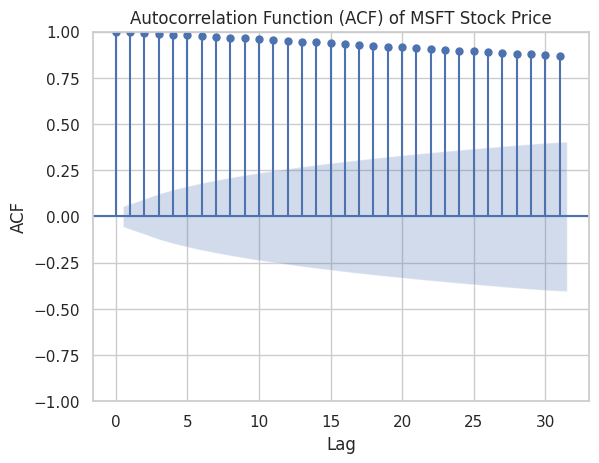

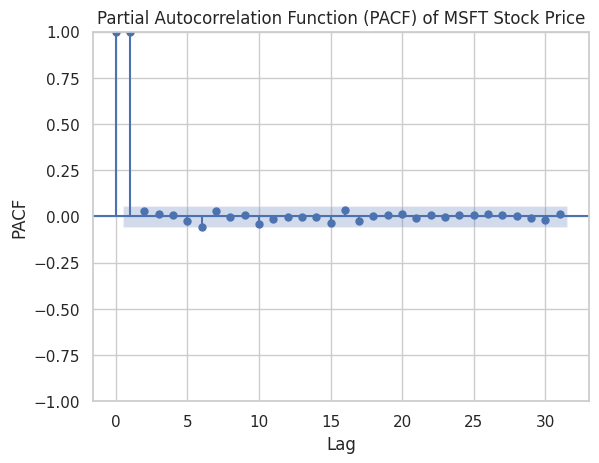

In [ ]:
plot_acf(msft_data['Adj Close'])
plt.title('Autocorrelation Function (ACF) of MSFT Stock Price')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plot_pacf(msft_data['Adj Close'])
plt.title('Partial Autocorrelation Function (PACF) of MSFT Stock Price')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

### Model 1

Root Mean Squared Error (RMSE): 66.56460894808286


<ipython-input-204-d38d3d893528>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions
<ipython-input-204-d38d3d893528>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['residuals'] = test['Adj Close'] - test['predictions']


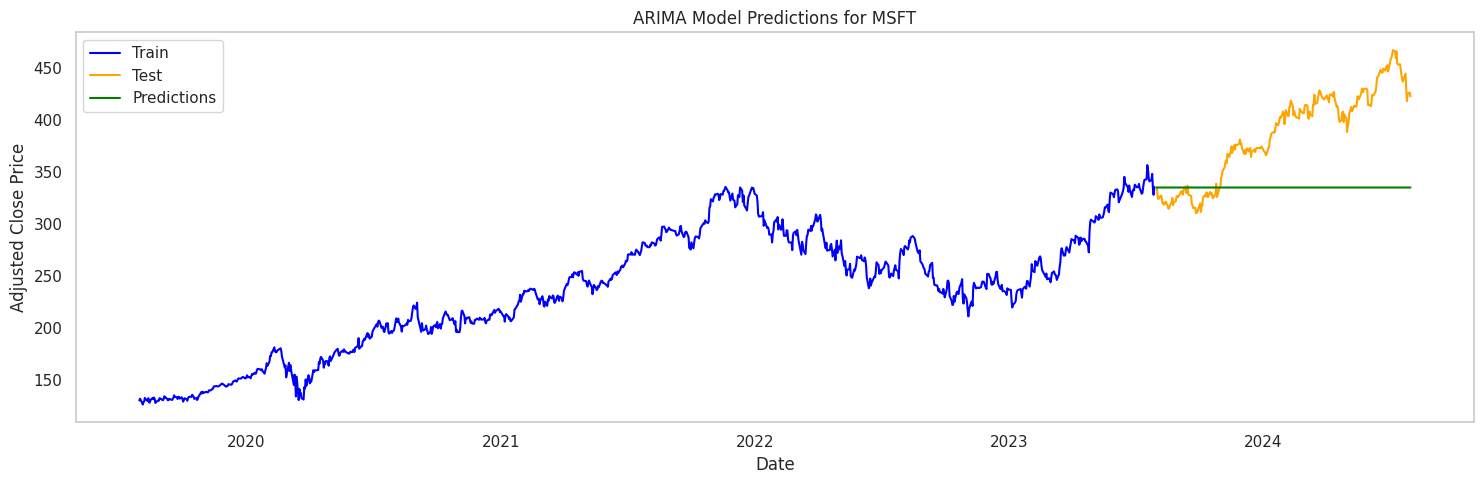

In [ ]:
order = (1, 1, 0) #from pacf we get p, from acf we get q
model = ARIMA(train['Adj Close'], order=order)
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(test))

rmse = sqrt(mean_squared_error(test['Adj Close'], predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

test['predictions'] = predictions
test['residuals'] = test['Adj Close'] - test['predictions']


plt.figure(figsize=(15, 5))
sns.lineplot(data=train, x='Date', y='Adj Close', label='Train', color='blue')
sns.lineplot(data=test, x='Date', y='Adj Close', label='Test', color='orange')
sns.lineplot(x=test['Date'], y=test['predictions'], label='Predictions', color='green')
plt.title('ARIMA Model Predictions for MSFT')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
test.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,predictions,residuals
1006,2023-07-31,336.920013,337.700012,333.359985,335.920013,333.312622,25446000,335.089816,-1.777194
1007,2023-08-01,335.190002,338.540009,333.700012,336.339996,333.729340,18311900,335.146126,-1.416786
1008,2023-08-02,333.630005,333.630005,326.359985,327.500000,324.957977,27761300,335.141276,-10.183298
1009,2023-08-03,326.000000,329.880005,325.950012,326.660004,324.124512,18253700,335.141693,-11.017182
1010,2023-08-04,331.880005,335.140015,327.239990,327.779999,325.235779,23727700,335.141657,-9.905879


<Axes: >

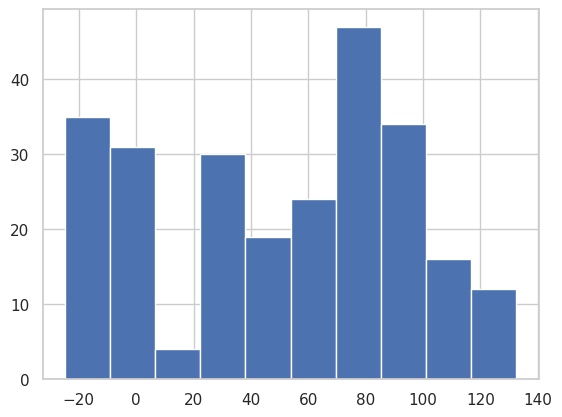

In [ ]:
test['residuals'].hist()

In [ ]:
test['residuals'].mean()

50.33475441590269

### Model 2

ADF Statistic: -1.1907822313366694
p-value: 0.6775483406155399


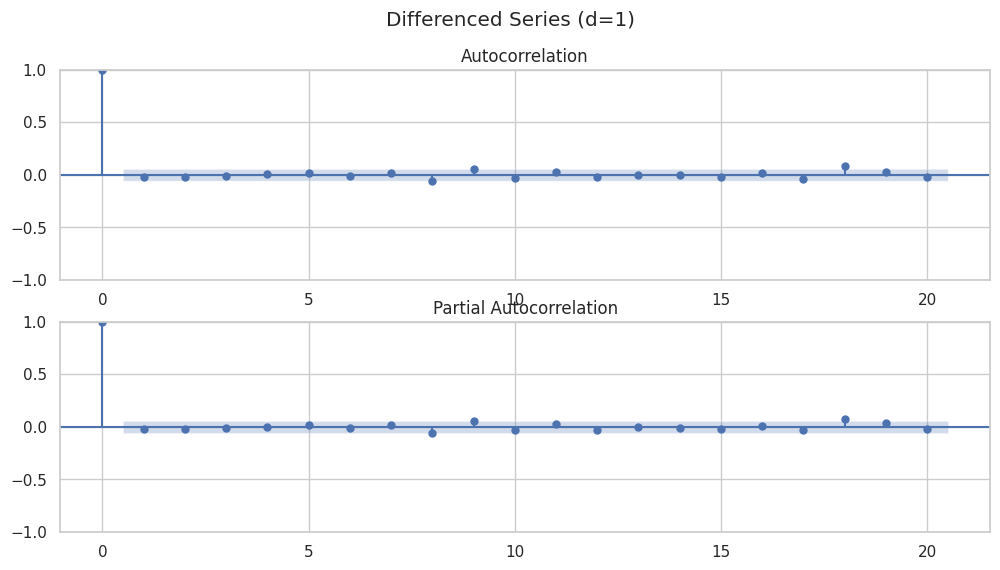

Ideal d: 1


In [ ]:
adf_result = adfuller(aapl_data['Adj Close'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# If not stationary, apply differencing
d = 0
while adf_result[1] > 0.05:
    d += 1
    differenced_data = np.diff(aapl_data['Adj Close'], n=d)
    adf_result = adfuller(differenced_data)

    # Plot ACF and PACF of the differenced series
    plt.figure(figsize=(12, 6))
    plot_acf(differenced_data, lags=20, ax=plt.subplot(211))
    plot_pacf(differenced_data, lags=20, ax=plt.subplot(212))
    plt.suptitle(f'Differenced Series (d={d})')
    plt.show()

print(f'Ideal d: {d}')

Root Mean Squared Error (RMSE): 66.13975642695681


<ipython-input-209-50e7241454c3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions
<ipython-input-209-50e7241454c3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['residuals'] = test['Adj Close'] - test['predictions']


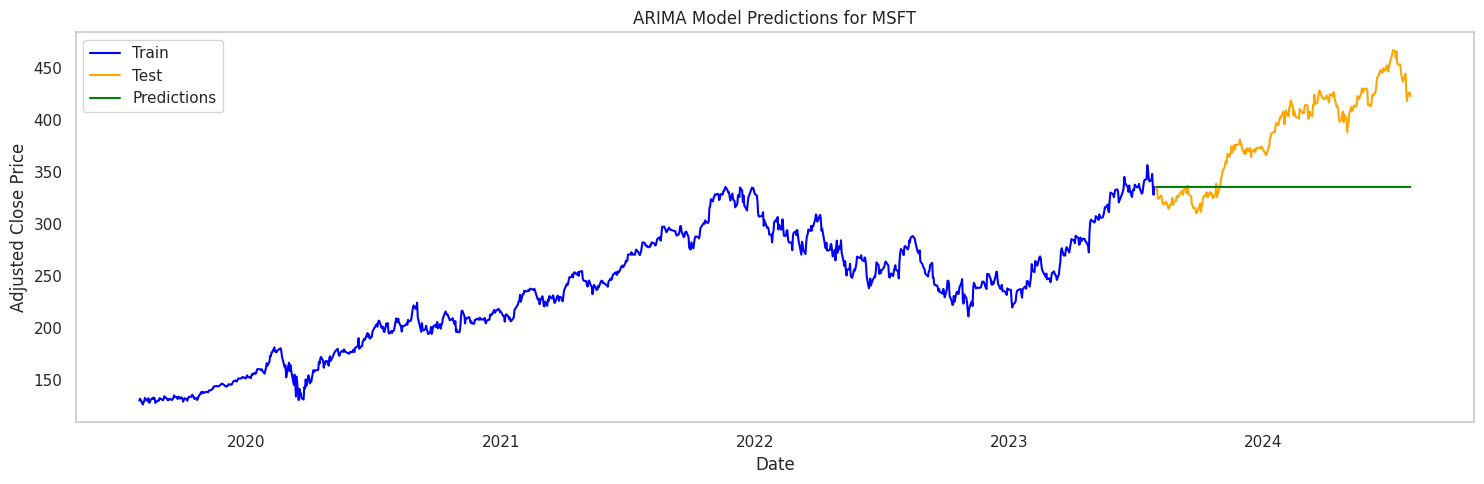

In [ ]:
order = (1, 1, 1) #from adf, we get p, q, and d
model = ARIMA(train['Adj Close'], order=order)
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(test))

rmse = sqrt(mean_squared_error(test['Adj Close'], predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

test['predictions'] = predictions
test['residuals'] = test['Adj Close'] - test['predictions']


plt.figure(figsize=(15, 5))
sns.lineplot(data=train, x='Date', y='Adj Close', label='Train', color='blue')
sns.lineplot(data=test, x='Date', y='Adj Close', label='Test', color='orange')
sns.lineplot(x=test['Date'], y=test['predictions'], label='Predictions', color='green')
plt.title('ARIMA Model Predictions for MSFT')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
test.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,predictions,residuals
1006,2023-07-31,336.920013,337.700012,333.359985,335.920013,333.312622,25446000,335.723400,-2.410778
1007,2023-08-01,335.190002,338.540009,333.700012,336.339996,333.729340,18311900,335.713741,-1.984401
1008,2023-08-02,333.630005,333.630005,326.359985,327.500000,324.957977,27761300,335.709119,-10.751142
1009,2023-08-03,326.000000,329.880005,325.950012,326.660004,324.124512,18253700,335.706909,-11.582397
1010,2023-08-04,331.880005,335.140015,327.239990,327.779999,325.235779,23727700,335.705851,-10.470072


<Axes: >

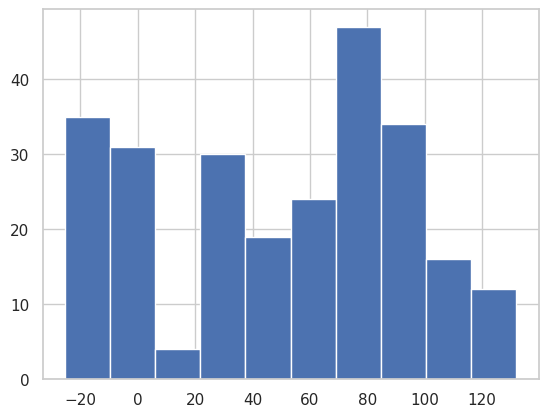

In [ ]:
test['residuals'].hist()

In [ ]:
test['residuals'].mean()

49.77120358216967

### Analysis of ARIMA Models of MSFT

The first ARIMA model for MSFT was with the order (1,1,0), the p was determined utilizing the pacf, the q was determined utilizing the acf, while the d was chosen as 0.

This resulted in an RMSE score of 66.56.

The residual histogram was noticed to be slightly left-skewed, with a mean of 50.33. The positive mean suggests that the predictions were extremely lower than actual values.

The second ARIMA model for MSFT was with the order (1,1,1), the p was determined utilizing the pacf after differencing, the q was determined utilzing the acf after differencing, and the ideal d was suggested as 1.

This resulted in an RMSE score of 66.14, which is slightly better than model 1.

The residual histogram remained similar, while the mean had changed to 49.77, suggesting that the model was now predicting slightly better now, as even though the predicitions are still lower than the actual, the margin by which it is lower has decreased.